crossing time t is t(y_exit)-t(y_entrance) the time where the sphere exits and subtracting the time it had enetered the interface
For bouncing we need to do it manually becuase there are more than 1 relevant points
found Interface_thickness =  0.017
Index = 1, crossing time = 10.05000[sec], untill minimum time = 4.36667[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 2, crossing time = 1.38333[sec], untill minimum time = 4.63333[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 3, crossing time = 10.06667[sec], untill minimum time = 4.53333[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 4, crossing time = 0.60000[sec], untill minimum time = 1.71667[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 5, crossing time = 0.58333[sec], untill minimum time = 1.70000[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 6, crossing time = 0.53333[sec], untill minimum time = 1.51667[sec] N = 2.235[1/sec], 1/N = 0.447[sec]
Index = 7, crossing time = 0.40000[sec], untill minimum time = 1.25000[sec] N = 2.

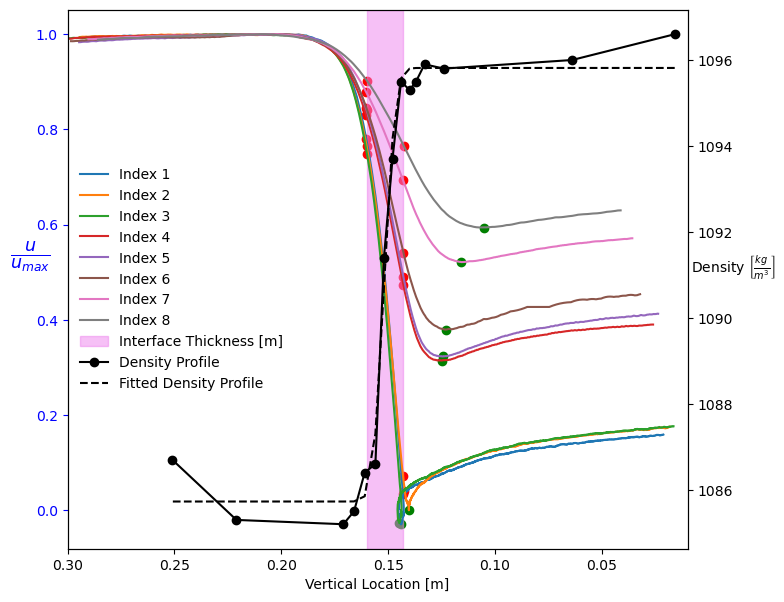

In [5]:
import os
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import re
from datetime import date

def extract_date(string):
    pattern = r'(\d{4})/(\d{1,2})/(\d{1,2})'
    match = re.search(pattern, string)
    if match:
        year, month, day = map(int, match.groups())
        try:
            return date(year, month, day)
        except ValueError:
            return None
    else:
        return None
    


plots_folder = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Plots'
excel_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx'
pickle_location = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\The Big Pickle.pkl'
the_pickle = Mf.load_pickle(pickle_location)
the_keys = the_pickle.keys()

# 'Vertical Location For Velocity [m] list', 'Velocity Times [sec] list', 'Velocity [m/s] list'
# all_data = []



# from IPython.display import Markdown
# display(Markdown(r'$\int_{t_{1}}^{t_{2}} u(t) \,dt = L$'))
print('crossing time t is t(y_exit)-t(y_entrance) the time where the sphere exits and subtracting the time it had enetered the interface\nFor bouncing we need to do it manually becuase there are more than 1 relevant points')

to_skip = [
    'Object To Follow',
    'Experiment Date 2023/12/20 Experiment Number 1 Record Number 1',
    'Experiment Date 2023/12/18 Experiment Number 2 Record Number 5',
    'Experiment Date 2024/1/23 Experiment Number 2 Record Number 12',
    'Experiment Date 2024/1/23 Experiment Number 2 Record Number 13',
    'Experiment Date 2024/1/2 Experiment Number 2 Record Number 2',
    'Experiment Date 2024/1/2 Experiment Number 2 Record Number 3',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 13',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 15',
    'Experiment Date 2024/1/22 Experiment Number 2 Record Number 18',
    ]

# to_do = ['Experiment Date 2024/1/24 Experiment Number 1']
# to_do = ['Experiment Date 2024/1/23 Experiment Number 1']
to_do = ['Experiment Date 2024/1/21 Experiment Number 1']
to_do = ['Experiment Date 2024/1/22 Experiment Number 1']
to_do = ['Experiment Date 2024/2/22 Experiment Number 1']

show_legend = True
date = extract_date(to_do[0])

y_loccccc, densityccccc = Mf.load_density_profile_from_excel(date=date)
y_loccccc2 = np.array(y_loccccc)
densityccccc2 = np.array(densityccccc)
Interface_height = Mf.find_average_density_location(y_loccccc2, densityccccc2)
Interface_thickness = Mf.find_interface_thickness(y_loccccc2, densityccccc2)

interface_lower_location = Interface_height + Interface_thickness/2
interface_upper_location = Interface_height - Interface_thickness/2

print(f'found Interface_thickness =  {Interface_thickness}')

fig, ax = plt.subplots(figsize=(8, 7))
for ind, el in enumerate(the_keys):
    holo = el[:45]
    if holo in to_do:
        if not el in to_skip:
            current = the_pickle[el]

            locc =  np.array(current['Vertical Location For Velocity [m] list'])
            timee = current['Velocity Times [sec] list']
            velocii = np.array(current['Velocity [m/s] list'])
            date = current['Experiment Date']
            sphere_densityy = current['Calculated sphere density [kg/m^3]']
            sphere_diameterr = current['Sphere Diameter [m]']*1000
            exp_num = current['Experiment number']
            indexxxx = current['Record number']
            # fps = current['Frames Per Second']

        

            #find interface upper and lower index
            lower_index = np.abs(locc - interface_lower_location).argmin()
            upper_index = np.abs(locc - interface_upper_location).argmin()

       
            if f'Experiment Date {date} Experiment Number {exp_num} Record Number {indexxxx}' == 'Experiment Date 2024/2/22 Experiment Number 1 Record Number 1':
                upper_index = 820
            if f'Experiment Date {date} Experiment Number {exp_num} Record Number {indexxxx}' == 'Experiment Date 2024/2/22 Experiment Number 1 Record Number 3':
                upper_index = 850
            
            pos_velo = -velocii
            min_index = np.where(pos_velo == min(pos_velo))[0][0]
            passing_time = timee[upper_index]-timee[lower_index]
            minimum_time = timee[min_index]-timee[lower_index]
            print(f"Index = {indexxxx}, crossing time = {passing_time:.5f}[sec], untill minimum time = {minimum_time:.5f}[sec] N = {current['Brunt Number']:.3f}[1/sec], 1/N = {1/current['Brunt Number']:.3f}[sec]")


            ax.plot(locc, -velocii/max(-velocii), label = f'Index {indexxxx}')
            ax.scatter(locc[lower_index], -velocii[lower_index]/max(-velocii), color ='red')
            ax.scatter(locc[upper_index], -velocii[upper_index]/max(-velocii), color ='red')
            ax.scatter(locc[min_index], -velocii[min_index]/max(-velocii), color ='green')
         

            # old
            # y_values_passing = locc[lower_index:upper_index]
            # velocty_of_passing = velocii[lower_index:upper_index]
            # passing_time = scipy.integrate.trapz(velocty_of_passing, y_values_passing)
            # print(velocty_of_passing[0],velocty_of_passing[1],y_values_passing[0],y_values_passing[1])

            # print(velocty_of_index, lower_index, upper_index)

            
            
            # ax.plot(locc, -velocii/max(-velocii), label = f'Index = {indexxxx} diameter = {sphere_diameterr:.2f} density = {sphere_densityy:.2f}')
            # ax.plot(locc, -velocii/max(-velocii), label = date + " " + str(int(el[-2:])))
            # ax.plot(locc, -velocii/max(-velocii))


holo = to_do[0][:45]
hight_of_y_label = 0.55
rho_function = Mf.create_callable_function_of_data(y_loccccc, densityccccc)
Interface_thickness

first_color = 'blue'
ax.set_xlabel(r'Vertical Location [m]', fontsize = 10)
ax.set_ylabel(r'$\frac {u} {u_{max}}$', color = first_color, rotation = 0, fontsize=18, y=hight_of_y_label-0.04)
ax.tick_params('y', colors = first_color)
# ax.invert_xaxis()



# Define a model function
p0 = [2*np.pi/Interface_thickness, Interface_height, np.abs(densityccccc2[-1]-densityccccc2[0])/2, np.average(densityccccc2)] #initial guess
y_fit = Mf.fit_error_function_to_data(y_loccccc2, densityccccc2, p0=p0)


secod_color = 'black'
ax2 = ax.twinx()

Interface_height = Mf.find_average_density_location(y_loccccc2, densityccccc2)
interface_lower_location = Interface_height - Interface_thickness/2


# Define the coordinates and dimensions of the rectangle
rect_x = interface_lower_location #[m]
rect_width = Interface_thickness
rect_y = ax.get_ylim()[0]
rect_height = ax.get_ylim()[1] - rect_y # Cover the entire y-axis range
rect_patch = patches.Rectangle((rect_x, rect_y), rect_width, rect_height, alpha=0.5, color='violet', label='Interface Thickness [m]')
ax.add_patch(rect_patch)


ax2.plot(y_loccccc2, densityccccc2,'-o', color=secod_color, label= 'Density Profile')
ax2.plot(y_loccccc2, y_fit,'--', color=secod_color, label= 'Fitted Density Profile')
ax2.set_ylabel(r'Density $ \left[ \frac {kg} {m^3} \right]$', color=secod_color, rotation=0, labelpad=0, y=hight_of_y_label)
ax2.tick_params('y', colors=secod_color)


# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
if show_legend:
    plt.legend(lines + lines2, labels + labels2, fancybox=True, framealpha=0, loc='center left')

# ax2.set_xlim(left=None, right=0.3)
ax2.set_xlim(left=0.01, right=0.3)

plt.gca().invert_xaxis()
# plt.legend()

plt.show()

In [ ]:
velocities = np.gradient(sphere_location[:,0], dt)


array([1., 1., 3., 3., 1., 1.])

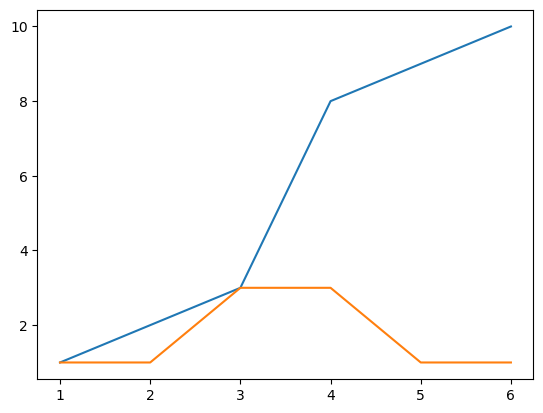

In [11]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 2, 3, 8, 9, 10])
plt.plot(x, y)
f = np.gradient(y,x)
plt.plot(x, f)
f

In [4]:
import sympy as sy
from sympy import pi
x, t, y, z, u, v, w, D = sy.symbols('x, t, y, z, u, v, w, D')
u = -t**3/100*(0.04-0.02*x)**(-1)
a=sy.diff(u,t)+u*sy.diff(u,x)
display(u)
display(a)
f = pi/175-pi/110*sy.tanh(pi/110*x)
f = sy.atanh(110/175)-pi/110*x
sy.solve(f,x)[0]

aaa = x/sy.sqrt(D*t)
display(aaa)
sy.diff(aaa, t)

-t**3/(100*(0.04 - 0.02*x))

0.00125*t**6/((0.04 - 0.02*x)*(1 - 0.5*x)**2) - 3*t**2/(100*(0.04 - 0.02*x))

x/sqrt(D*t)

-x/(2*t*sqrt(D*t))

In [18]:
asdas = sy.exp(-1/4*x**2)
asdas = sy.exp(-(t)**2*x**2)
asdas = sy.integrate(asdas, x)
sy.simplify(asdas)

Piecewise((sqrt(pi)*erf(x*sqrt(t**2))/(2*sqrt(t**2)), (t > 0) | (t < 0)), (x, True))

In [1]:
import My_functions as Mf
Mf.list_copy_to_excel([1,2,'elefant','c'], copy_as='c')

'1 2 elefant c'

In [4]:
import sympy as sy
from sympy import pi
x, t, y, z, u, v, w = sy.symbols('x, t, y, z, u, v, w')
u = -t**3/100*(0.04-0.02*x)**(-1)
a=sy.diff(u,t)+u*sy.diff(u,x)
display(u)
display(a)
f = pi/175-pi/110*sy.tanh(pi/110*x)
f = sy.atanh(110/175)-pi/110*x
sy.solve(f,x)[0]

-t**3/(100*(0.04 - 0.02*x))

0.00125*t**6/((0.04 - 0.02*x)*(1 - 0.5*x)**2) - 3*t**2/(100*(0.04 - 0.02*x))

25.8771947972383

In [64]:
import sympy as sy
from sympy import pi
x, t, y, z, u, v, w = sy.symbols('x, t, y, z, u, v, w')
u = -t**3/100*(0.04-0.02*x)**(-1)
a=sy.diff(u,t)+u*sy.diff(u,x)
display(u)
display(a)
a.subs([(x, 0.45),(t,3)]).evalf()

-t**3/(100*(0.04 - 0.02*x))

0.00125*t**6/((0.04 - 0.02*x)*(1 - 0.5*x)**2) - 3*t**2/(100*(0.04 - 0.02*x))

40.2312779027223

In [67]:
x, t, y, z, u, v, w = sy.symbols('x, t, y, z, u, v, w')

F = z-0.3*sy.exp(-(2*x-0.1*t))
difi = sy.diff(F,t)+u*sy.diff(F,x)+w*sy.diff(F,z)
difi

0.6*u*exp(0.1*t - 2*x) + w - 0.03*exp(0.1*t - 2*x)

In [7]:
import My_functions as Mf
pickle_location = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\The Big Pickle.pkl'

the_pickle = Mf.load_pickle(pickle_location)
vel = the_pickle['Experiment Date 2023/12/13 Experiment Number 1 Record Number 1']['Vertical Location For Velocity [m] list']
vel_time = the_pickle['Experiment Date 2023/12/13 Experiment Number 1 Record Number 1']['Velocity Times [sec] list']
vel_loc = the_pickle['Experiment Date 2023/12/13 Experiment Number 1 Record Number 1']['Velocity [m/s] list']

In [2]:
import pyperclip
a = pyperclip.paste()
b=a.replace('\n','').split('\r')
pyperclip.copy(f'TO_FIX = {b}')

# display images

In [1]:
import My_functions as Mf
folder = Mf.select_directory()
print(folder)
Mf.display_images_with_points_napari(folder, playback_fps = 13)

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


C:/Users/Morten/Desktop/PIV output/output/2024 1 24 - Rec 1/Multy/Vector Field


8

In [8]:
import numpy as np

y = np.array([1, 5, 3, 8.2, 8, 2, 7])

value_to_find = 8.1
abs_diff = np.abs(y - value_to_find)
index = np.argmin(abs_diff)

print("Index of the closest value to", value_to_find, ":", index)


Index of the closest value to 8.1 : 3


In [ ]:
a=(15)**2*(-2*(-1.5/10))*(1/((3-1.5/10*x)**5))
a=(15)**2*(-2*(-1.5/10))*(1/((3-1.5/10*x)**5))
a.subs(x, 3).evalf()

In [4]:
import numpy as np
ad = np.array([[1,2],[2,3],[3,1]])
length = len(ad)
new_column = np.arange(5, length + 5)

# Stack the new column horizontally to the original array
# ad_with_new_column = np.hstack((ad, new_column.reshape(-1, 1)))
ad_with_new_column = np.hstack((new_column.reshape(-1, 1), ad))
ad_with_new_column

array([[5, 1, 2],
       [6, 2, 3],
       [7, 3, 1]])

In [4]:
import My_functions as Mf
pathyy = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\object_to_follow.pkl'
# sphere_location_pixel = Mf.track_object_series(pic_folder, fft=True,
# 												image_number = 57,
# 												sphere_location = [501, 149],
# 												Object_data = [[455, 102], [455, 197], [547, 197], [547, 102]],
# 												PTV_data = [[384, 0], [384, 1024], [589, 1024], [589, 0]])

image_dir = Mf.select_directory()
image_files = Mf.find_pictures(image_dir)

image_number = 57
sphere_location = [501, 149]
Object_data = [[455, 102], [455, 197], [547, 197], [547, 102]]
PTV_data = [[384, 0], [384, 1024], [589, 1024], [589, 0]]
img_number, real_cor, object_range_cut, prior_knowledge, contrast = Mf.select_circle_napari_advance(image_dir)


bias = [object_range_cut[1].start + (object_range_cut[1].stop - object_range_cut[1].start)/2 - real_cor[0], object_range_cut[0].start + (object_range_cut[0].stop - object_range_cut[0].start)/2 - real_cor[1]]
im_a_path = image_files[img_number]
the_selected_image = Mf.read_image(im_a_path)
object_pattern = the_selected_image[object_range_cut]

Mf.save_pickle(pathyy, [object_pattern, bias, contrast, prior_knowledge, real_cor, object_range_cut, img_number, contrast, prior_knowledge, real_cor, object_range_cut, img_number, contrast, prior_knowledge, real_cor, object_range_cut, img_number])

The file "object_to_follow.pkl" has been saved at: C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis


In [7]:
import My_functions as Mf
import os

def find_folders(path):
    # Get the list of all files and folders in the specified path
    items = os.listdir(path)

    # Filter out only the folders
    folders = [os.path.join(path, item) for item in items if os.path.isdir(os.path.join(path, item))]

    return folders

# Replace 'your/path' with the actual path you want to search
# path_to_search = Mf.select_directory()
path_to_search = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures'

folders_in_path = find_folders(path_to_search)

for ff in folders_in_path[1:-1]:
    print(ff)
# print(folders_in_path[1:])
# I DID = 17 20 24 26 27 28 08 18 21 

listy = [r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 17',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 18',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 20',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 24',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 26',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 27',
          r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 28',
            r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2024 01 08',
            r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2024 01 18',
            r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2024 01 21']

C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 12
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 13
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 17
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 18
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 20
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 21
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 24
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 26
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 27
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 28
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2024 01 02
C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 202

# OMF

In [1]:
import My_functions as Mf
the_vector_folder = Mf.select_directory()
# Mf.display_color_images_with_napari(the_vector_folder)
Mf.display_images_with_points_napari(the_vector_folder)

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


636

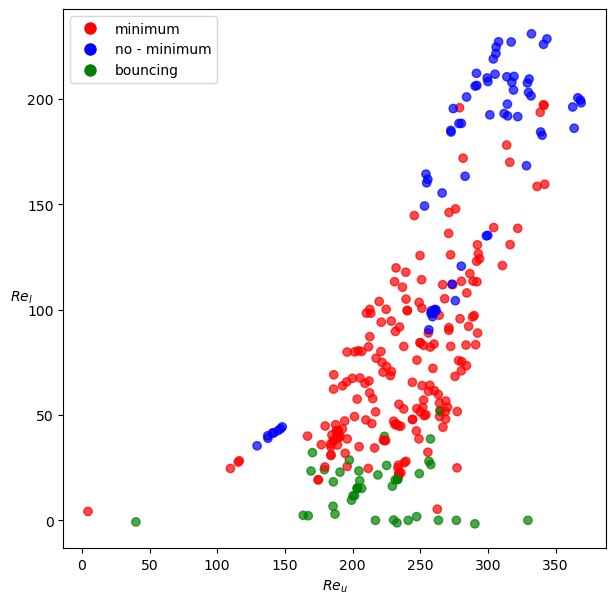

In [13]:
import os
import My_functions as Mf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.constants import g, pi

excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

r'''
'Experiment Date',
'Experiment number',
'Record number',
'Sphere Type',
'Sphere Diameter [m]',
'Sphere density [kg/m^3]',
'Upper density [kg/m^3]',
'Lower density [kg/m^3]',
'Upper viscosity [m^2/sec]',
'Lower viscosity [m^2/sec]',
'Upper velocity [m/s]',
'Lower velocity [m/s]',
'Minimum velocity [m/s]',
'Upper Re',
'Lower Re',
'Upper Fr',
'Lower Fr',
'Brunt Number',
'State',
'Notes',
'Data Processing Date',
'Data Processing Hour',
'Upper Ar',
'Lower Ar'
'Calculated sphere density [kg/m^3]']
'mg [N]'
'Lower bouyancy [N]'
'''

state_column = 'State'
solution_column = 'Solution'
date_column = 'Experiment Date'

brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
Fr_l1 = 'Lower Fr'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
u_upper1 = 'Upper velocity [m/s]'
rho_s1 = 'Calculated sphere density [kg/m^3]'
interfacey1 = 'Interface width [m]'
traj_time1 = 'Full Trajectory Time [sec]'



df = pd.read_excel(excel_path)
# df = df[df[Re_u1] < 600]
# df.dropna(subset=[U_min1], inplace=True)


color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing':  'green'}
df['color'] = df[state_column].map(color_mapping)
solution_mapping = {'Water - Salt' : 'o', 'Water - Glycerol' : 's'}
df['marker type'] = df[solution_column].map(solution_mapping)

brunt = df[brunt1]
Re_u = df[Re_u1]
Re_l = df[Re_l1]
Fr_u = df[Fr_u1]
Fr_l = df[Fr_l1]
nu_u = df[nu_u1]
nu_l = df[nu_l1]
rho_u = df[rho_u1]
rho_l = df[rho_l1]
sphere_diameter = df[sphere_diameter1]

U_min = df[U_min1]
u_upper = df[u_upper1]
rho_s = df[rho_s1]
interfacey = df[interfacey1]
traj_time = df[traj_time1]


volume = 3*pi/4*(sphere_diameter/2)**3
mass = rho_s*volume
Fb = volume*rho_l

y_col = (rho_s-rho_l)/4
y_col = Re_l
y_col = (rho_s/rho_l)
x_col = mass*g-Fb

x_col = Re_u
y_col = Re_l


y_label = r'$\frac {mg \cdot U_u} {\nu_u \cdot \rho_u \cdot a^2}$'
y_label = r'$\frac {\rho_{sphere}} {\rho_{lower}}$'
x_label = r'${Re}_{u}$'
y_label = r'${Re}_{l}$'


fig, ax = plt.subplots(figsize=(7, 7))


plt.scatter(x_col, y_col, c=df['color'], alpha=0.7)

legend_elements=[Line2D([0], [0], marker='o', color='w', label='minimum', markerfacecolor=color_mapping.get('minimum'), markersize=10)]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='no - minimum', markerfacecolor=color_mapping.get('no - minimum'), markersize=10))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='bouncing', markerfacecolor=color_mapping.get('bouncing'), markersize=10))
# legend_elements.append(Line2D([0], [0], marker='s', color='w', label='Water - Glycerol', markerfacecolor=solution_mapping.get('Water - Glycerol'), markersize=10))
# legend_elements.append(Line2D([0], [0], marker='o', color='w', label='Water - Salt', markerfacecolor=solution_mapping.get('Water - Salt'), markersize=10))

ax.legend(handles=legend_elements)

plt.xlabel(x_label)
# plt.ylabel(y_label, rotation=0, fontsize = 16)
ylabel = plt.ylabel(y_label, rotation=0)
ylabel.set_verticalalignment('bottom')  # Align at the bottom of the label
ylabel.set_y(ylabel.get_position()[1] - 0.05)
plots_folder = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Plots'
# plt.xlim(-1,400)
# plt.ylim(-10,250)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
plt.savefig(os.path.join(plots_folder, 'Re_map.pgf'), format='pgf')
plt.show()

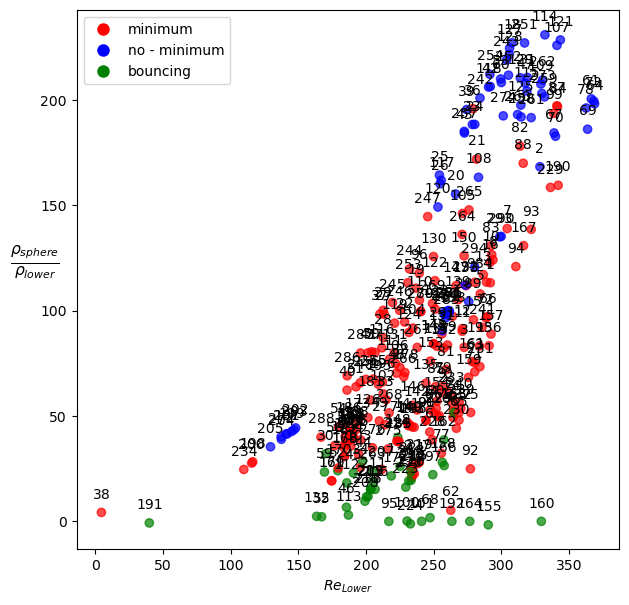

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.constants import g, pi

excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

r'''
'Experiment Date',
'Experiment number',
'Record number',
'Sphere Type',
'Sphere Diameter [m]',
'Sphere density [kg/m^3]',
'Upper density [kg/m^3]',
'Lower density [kg/m^3]',
'Upper viscosity [m^2/sec]',
'Lower viscosity [m^2/sec]',
'Upper velocity [m/s]',
'Lower velocity [m/s]',
'Minimum velocity [m/s]',
'Upper Re',
'Lower Re',
'Upper Fr',
'Lower Fr',
'Brunt Number',
'State',
'Notes',
'Data Processing Date',
'Data Processing Hour',
'Upper Ar',
'Lower Ar'
'Calculated sphere density [kg/m^3]']
'''

state_column = 'State'
date_column = 'Experiment Date'

brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
Fr_l1 = 'Lower Fr'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
u_upper1 = 'Upper velocity [m/s]'
rho_s1 = 'Calculated sphere density [kg/m^3]'
interfacey1 = 'Interface width [m]'
traj_time1 = 'Full Trajectory Time [sec]'



df = pd.read_excel(excel_path)
df =df[df[Re_u1]<600]
# df.dropna(subset=[U_min1], inplace=True)


color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing':  'green'}
df['color'] = df[state_column].map(color_mapping)

brunt = df[brunt1]
Re_u = df[Re_u1]
Re_l = df[Re_l1]
Fr_u = df[Fr_u1]
Fr_l = df[Fr_l1]
nu_u = df[nu_u1]
nu_l = df[nu_l1]
rho_u = df[rho_u1]
rho_l = df[rho_l1]
sphere_diameter = df[sphere_diameter1]

U_min = df[U_min1]
u_upper = df[u_upper1]
rho_s = df[rho_s1]
interfacey = df[interfacey1]
traj_time = df[traj_time1]



Re = Re_u
Ab1 = pi*sphere_diameter**2/4 #the projected surface area
Cd = 0.4 + 24/Re + 6/(1+np.sqrt(Re))
Fd = Cd*rho_u*u_upper**2*Ab1/2

volume = 4/3*pi*(sphere_diameter/2)**3
# wake_volume = f(Re) 

x_col = Fd/(g*volume*(rho_s-rho_l))
y_col = rho_s/rho_l



volume = 3*pi/4*(sphere_diameter/2)**3
mass = rho_s*volume
Fb = volume*rho_l

y_col = (rho_s-rho_l)/4
y_col = (rho_s/rho_l)

y_col = Re_u
x_col = (mass*g-Fb)/0.0005

y_col = U_min/u_upper
x_col = Re_l**(1/2)



y_col = Re_l
x_col = Re_u

y_label = r'$\frac {mg \cdot U_u} {\nu_u \cdot \rho_u \cdot a^2}$'
y_label = r'$\frac {\rho_{sphere}} {\rho_{lower}}$'
x_label = r'${Re}_{Lower}$'


# Add the following lines to create a unique marker for each "Sphere Type"
sphere_type_mapping = {'P1': 'o', 'P2': '*', 'P3': 'D', 'P4': 's'}
df['sphere marker'] = df['Sphere Type'].map(sphere_type_mapping)




fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(x_col, y_col, c=df['color'], alpha=0.7)



# for marker, color in zip(df['sphere marker'].unique(), df['color'].unique()):
#     subset = df[df['sphere marker'] == marker]
#     plt.scatter(subset[Re_l1], subset[Re_u1], c=color, marker=marker, label=marker, alpha=0.7)


legend_elements=[Line2D([0], [0], marker='o', color='w', label='minimum', markerfacecolor=color_mapping.get('minimum'), markersize=10)]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='no - minimum', markerfacecolor=color_mapping.get('no - minimum'), markersize=10))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='bouncing', markerfacecolor=color_mapping.get('bouncing'), markersize=10))

ax.legend(handles=legend_elements)

plt.xlabel(x_label)
plt.ylabel(y_label, rotation=0, fontsize = 16)


show_index = True
if show_index:
    # Annotation loop
    for i, txt in enumerate(df['Index']):
        ax.annotate(txt, (x_col.iloc[i], y_col.iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.show()

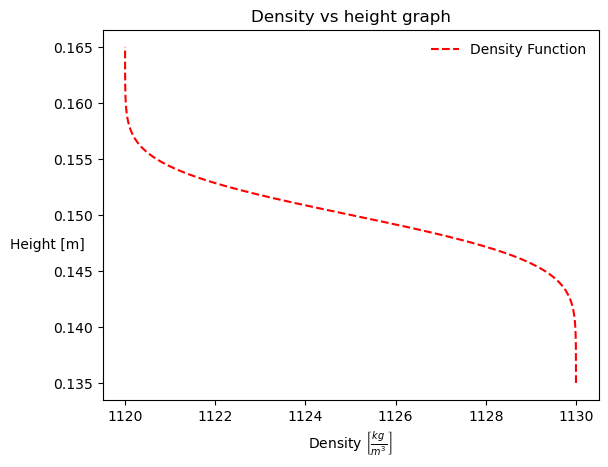

In [9]:
Interface_height = 0.15
Interface_thickness = 0.03
upper_density = 1120
lower_density = 1130

interface_upper_location = Interface_height + Interface_thickness/2 #[m]
interface_lower_location = Interface_height - Interface_thickness/2 #[m]
amplitude = (lower_density-upper_density)/2
middle_of_density = np.mean([upper_density, lower_density])
interface_center = np.mean([interface_upper_location, interface_lower_location]) #[m]
interface_width = interface_upper_location-interface_lower_location #[m]


rho_function = Mf.density_function(amplitude = amplitude, interface_width = interface_width, center_of_interface = interface_center, mean_density_value = middle_of_density, plot = False)

if True:
    x_values = np.linspace(interface_center-interface_center*0.1, interface_center+0.1*interface_center, 1000)
    y_values = rho_function(x_values)
    plt.title('Density vs height graph')
    plt.plot(y_values, x_values, '--', label='Density Function', color='red')
    plt.xlabel(r'Density $ \left[ \frac {kg} {m^3} \right]$', rotation=0)
    ylabel = plt.ylabel('Height [m]', rotation=0)
    ylabel.set_verticalalignment('bottom')  # Align at the bottom of the label
    ylabel.set_y(ylabel.get_position()[1] - 0.1)
    plt.legend(fancybox=True, framealpha=0)
    plt.savefig(os.path.join(Mf.select_directory(), 'density_profile.pgf'), format='pgf')

    plt.show()

In [3]:
import My_functions as Mf
Mf.skip_photos(Mf.select_directory(), 8)

the folder C:/Users/Morten/Desktop/New folder\C001H001S0003 skipped by 8 has been created
.cihx file saved to C:/Users/Morten/Desktop/New folder\C001H001S0003 skipped by 8\C001H001S0003.cihx


In [1]:
import My_functions as Mf
import os
pic_folder = Mf.select_directory()
picture_list = Mf.find_pictures(pic_folder)
img_number, real_cor, object_range_cut, prior_knowledge, contrast = Mf.select_circle_napari_advance(pic_folder,
                                                                                                    image_number = 53,
                                                                                                    sphere_location = [469, 157],
                                                                                                    Object_data = [[435, 123], [435, 196], [505, 196], [505, 123]],
                                                                                                    PTV_data = [[375, 0], [375, 1024], [608, 1024], [608, 0]])

bias_x, bias_y = object_range_cut[1].start + (object_range_cut[1].stop - object_range_cut[1].start)/2 - real_cor[0], object_range_cut[0].start + (object_range_cut[0].stop - object_range_cut[0].start)/2 - real_cor[1]
im_a_path = picture_list[img_number]
the_selected_image = Mf.read_image(im_a_path)
object_array = the_selected_image[object_range_cut]
PIV_Range = slice(0,1024), slice(0,1024)
data_for_PIV  = [prior_knowledge, bias_x, bias_y, object_array, PIV_Range]
   
   # We need only this: and they all can be constant.
    # prior_knowledge, bias_x, bias_y, object_array, PIV_Range



Mf.save_pickle(os.path.join(pic_folder, 'General Data For PTV.pkl'), data_for_PIV)

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


The file General Data For PTV.pkl has been saved at: C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Lab Pictures/experiment 2023 12 13/C001H001S0017


In [1]:
import My_functions as Mf
the_vector_folder = Mf.select_directory()
Mf.display_color_images_with_napari(the_vector_folder, playback_fps=10)

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
import My_functions as Mf
fluid_density = (1120, 1127)
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 9.525/1000, sphere_density = 1128, nu = (1.56347e-06, 1.6654e-06) , to_print=True), fluid_density[1]/fluid_density[0])

fluid_density = (1120, 1127)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 9.525/1000, sphere_density = 1134, nu = (1.56347e-06, 1.6654e-06) , to_print=True), fluid_density[1]/fluid_density[0])

fluid_density = (1120, 1127)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = (10.525)/1000, sphere_density = 1128, nu = (1.56347e-06, 1.6654e-06) , to_print=True), fluid_density[1]/fluid_density[0])


Ball with glycerol

In [5]:
import My_functions as Mf
fluid_density = (1100, 1108)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 10/1000, sphere_density = 1110, nu = (1.56347e-06, 1.6654e-06) , to_print=True), fluid_density[1]/fluid_density[0])

#https://www.met.reading.ac.uk/~sws04cdw/viscosity_calc.html
# 1 liter water and 0.4 liter glycerol - 1081.9
# 1 liter water and 0.54 liter glycerol - 1100.5
fluid_density = (1081.9, 1100.5)
nu = (0.0000026019, 0.0000034315)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 10/1000, sphere_density = 1110, nu = nu , to_print=True), fluid_density[1]/fluid_density[0])


us : 
rho_p/rho_f_1 =  1.009090909090909
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.037016 [m/s] 
U_2 = 0.013494 [m/s]
Re1 =  236.75850137013433
Re2 =  81.02842694909742
(1100, 1108)               (236.75850137013433, 81.02842694909742) 1.0072727272727273

us : 
rho_p/rho_f_1 =  1.0259728255846197
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.062749 [m/s] 
U_2 = 0.029999 [m/s]
Re1 =  241.16744988092313
Re2 =  87.42227150047886
(1081.9, 1100.5)               (241.16744988092313, 87.42227150047886) 1.0171919770773639


In [11]:
import My_functions as Mf
fluid_density = (1100, 1108)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 10/1000, sphere_density = 1110, nu = (1.56347e-06, 1.6654e-06) , to_print=True), fluid_density[1]/fluid_density[0])

#https://www.met.reading.ac.uk/~sws04cdw/viscosity_calc.html
# 1 liter water and 0.85 liter glycerol - 1130.9
# 1 liter water and 1.4 liter glycerol - 1164.0
fluid_density = (1130.9, 1164.0)
nu = (0.0000058494, 0.000012278)
print('\nus : ')
print(fluid_density, '             ', Mf.calc_parameters(fluid_density = fluid_density,sphere_diameter = 9.7/1000, sphere_density = 1300, nu = nu , to_print=True), fluid_density[1]/fluid_density[0])



us : 
rho_p/rho_f_1 =  1.009090909090909
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.037016 [m/s] 
U_2 = 0.013494 [m/s]
Re1 =  236.75850137013433
Re2 =  81.02842694909742
(1100, 1108)               (236.75850137013433, 81.02842694909742) 1.0072727272727273

us : 
rho_p/rho_f_1 =  1.1495269254576002
the symbolic expr Eq(A_b*U**2*rho_f*(0.4 + 6/(sqrt(U*a/nu) + 1) + 24*nu/(U*a))/2 + V_b*g*rho_f, V_b*g*rho_s)
All good
U_1 = 0.148817 [m/s] 
U_2 = 0.108168 [m/s]
Re1 =  246.78252162124284
Re2 =  85.45610614188223
(1130.9, 1164.0)               (246.78252162124284, 85.45610614188223) 1.0292687240251126


In [1]:
import My_functions as Mf
foldy = Mf.select_directory()
Mf.skip_photos(foldy, 2)
#asd

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


.cihx file saved to C:/Users/Morten/Desktop/New folder/New folder skipped\C001H001S0004.cihx


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        NaN
1        red
2        red
3        red
4        red
       ...  
210      red
211      red
212      red
213    green
214    green
Name: color, Length: 215, dtype: object

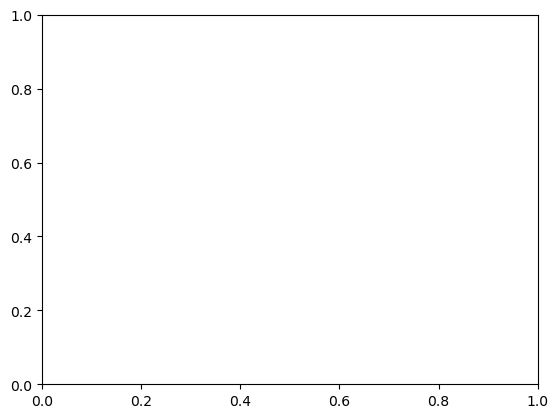

In [4]:
import My_functions as Mf
Mf.plot_states_with_Perceptron(use_perceptron=False)
# Mf.plot_states_with_Perceptron()
# Mf.plot_states_with_Perceptron(the_y_column = 'Upper Fr', the_x_column= 'Lower Fr', use_perceptron = False)
# Mf.plot_states_with_Perceptron(the_y_column = 'Upper Fr', the_x_column= 'Lower Re', use_perceptron = False)

In [ ]:
import My_functions as Mf

foldy = Mf.select_directory()

In [ ]:
import pandas as pd
excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Dimensionless Numbers PTV.xlsx"

df = pd.read_excel(excel_path)
list(df.columns.values)

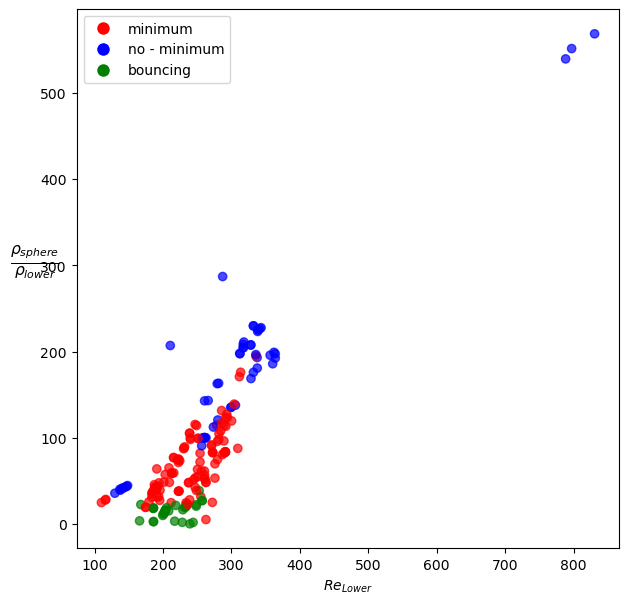

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
from scipy.constants import g, pi

excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

r'''
'Experiment Date',
 'Experiment number',
 'Record number',
 'Sphere Type',
 'Sphere Diameter [m]',
 'Sphere density [kg/m^3]',
 'Upper density [kg/m^3]',
 'Lower density [kg/m^3]',
 'Upper viscosity [m^2/sec]',
 'Lower viscosity [m^2/sec]',
 'Upper velocity [m/s]',
 'Lower velocity [m/s]',
 'Minimum velocity [m/s]',
 'Upper Re',
 'Lower Re',
 'Upper Fr',
 'Lower Fr',
 'Brunt Number',
 'State',
 'Notes',
 'Data Processing Date',
 'Data Processing Hour',
 'Upper Ar',
 'Lower Ar'
 'Calculated sphere density [kg/m^3]']
 mg [N]
 Lower bouyancy [N]
'''

state_column = 'State'
date_column = 'Experiment Date'

brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
Fr_l1 = 'Lower Fr'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
u_upper1 = 'Upper velocity [m/s]'
rho_s1 = 'Calculated sphere density [kg/m^3]'
interfacey1 = 'Interface width [m]'
traj_time1 = 'Full Trajectory Time [sec]'
lower_bouyancy1 = 'Lower bouyancy [N]'
mmg1 = 'mg [N]'
upper_ar1 = 'Upper Ar'
lower_ar1 = 'Lower Ar'



df = pd.read_excel(excel_path)

df.dropna(subset=[U_min1], inplace=True)


color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing':  'green'}
df['color'] = df[state_column].map(color_mapping)

brunt = df[brunt1]
Re_u = df[Re_u1]
Re_l = df[Re_l1]
Fr_u = df[Fr_u1]
Fr_l = df[Fr_l1]
nu_u = df[nu_u1]
nu_l = df[nu_l1]
rho_u = df[rho_u1]
rho_l = df[rho_l1]
sphere_diameter = df[sphere_diameter1]

U_min = df[U_min1]
u_upper = df[u_upper1]
rho_s = df[rho_s1]
interfacey = df[interfacey1]
traj_time = df[traj_time1]
mmg = df[mmg1]
lower_bouyancy = df[lower_bouyancy1]
lower_ar = df[lower_ar1]
upper_ar = df[upper_ar1]






y_col = (rho_s-rho_l)/4
y_col = Re_l
x_col = Re_u




y_label = r'$\frac {mg \cdot U_u} {\nu_u \cdot \rho_u \cdot a^2}$'
y_label = r'$\frac {\rho_{sphere}} {\rho_{lower}}$'
x_label = r'${Re}_{Lower}$'


fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(x_col, y_col, c=df['color'], alpha=0.7)

legend_elements=[Line2D([0], [0], marker='o', color='w', label='minimum', markerfacecolor=color_mapping.get('minimum'), markersize=10)]
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='no - minimum', markerfacecolor=color_mapping.get('no - minimum'), markersize=10))
legend_elements.append(Line2D([0], [0], marker='o', color='w', label='bouncing', markerfacecolor=color_mapping.get('bouncing'), markersize=10))

ax.legend(handles=legend_elements)

plt.xlabel(x_label)
plt.ylabel(y_label, rotation=0, fontsize = 16)
plt.show()

# manual scaling factor

In [ ]:
# file_name = 'scaling_factor.pkl'
# if Masked:
#     file_name = file_name[:-4] + '_Mask.pkl'
# if file_name in Mf.files_in_folder(save_folder, 'pkl'):
#     scaling_factor = Mf.load_pickle(os.path.join(save_folder, file_name))
# else:
#     lenghght = Mf.calculate_distance_between_points_napari_notebook_line(picture_list[0], initial_guess = [[369.15, 191.93], [400.52, 191.93]], to_print=True) #pixel
#     print(lenghght)
#     known_lenght = 10/1000 #[m]
#     scaling_factor = lenghght/known_lenght #pixel/m
#     Mf.save_pickle(os.path.join(save_folder, file_name), scaling_factor)
#     print(os.path.join(save_folder, file_name))

# print('Scaling factor:', scaling_factor, '[pixel/m]')

In [7]:
import numpy as np
import scipy
import sympy as sp

# Define the symbolic variable
x = sp.symbols('x')

# Define your function symbolically
f_sym = x**3

# Define the function for numerical integration
def f_numeric(x):
    return x**3

# Define the integration range
a, b = -4, 5 

# Symbolic integration
integral_exact = sp.integrate(f_sym, (x, a, b))


# Define the integration points
x_values = np.linspace(a, b, 100)

# Numerical integration using the trapezoidal rule
integral_numeric = scipy.integrate.trapz(f_numeric(x_values), x_values)

# Calculate the error
error = abs(integral_exact - integral_numeric)

# Print the results
print("Exact integral:", integral_exact)
print("Numeric integral using trapezoidal rule:", integral_numeric)
print("Absolute error:", error)



Exact integral: 369/4
Numeric integral using trapezoidal rule: 92.2685950413223
Absolute error: 0.0185950413222997


In [9]:
import numpy as np

# Define the function
def f(x):
    return x**3

# Define the integration range
a, b = -3, 5

# Numerical integration using quad
result_quad, error_quad = scipy.integrate.quad(f, a, b)

# Numerical integration using Simpson's Rule
x_values = np.linspace(a, b, 100)
result_simps = scipy.integrate.simps(f(x_values), x_values)

# Print the results
print("Result using quad:", result_quad)
print("Error estimate using quad:", error_quad)
print("Result using Simpson's Rule:", result_simps)

# Compare the results
error_comparison = abs(result_quad - result_simps)
print("Absolute error between quad and Simpson's Rule:", error_comparison)


Result using quad: 136.0
Error estimate using quad: 1.9595348824146756e-12
Result using Simpson's Rule: 136.00001066004845
Absolute error between quad and Simpson's Rule: 1.0660048445743087e-05


In [11]:
import numpy as np
from scipy.integrate import quad, simps

# Example data points
x = np.linspace(0, 1, 100)
y = x**2

# Numerical integration using quad
result_quad, error_quad = quad(lambda j: np.interp(j, x, y), x[0], x[-1])

# Numerical integration using Simpson's Rule
result_simps = simps(y, x)

# Print the results
print("Result using quad:", result_quad)
print("Error estimate using quad:", error_quad)
print("Result using Simpson's Rule:", result_simps)

# Compare the results
error_comparison = abs(result_quad - result_simps)
print("Absolute error between quad and Simpson's Rule:", error_comparison)


Result using quad: 0.33335021622538563
Error estimate using quad: 4.950028972414593e-06
Result using Simpson's Rule: 0.3333333333333333
Absolute error between quad and Simpson's Rule: 1.6882892052316745e-05


C:\Users\Morten\AppData\Local\Temp\ipykernel_10484\3558375912.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result_quad, error_quad = quad(lambda j: np.interp(j, x, y), x[0], x[-1])


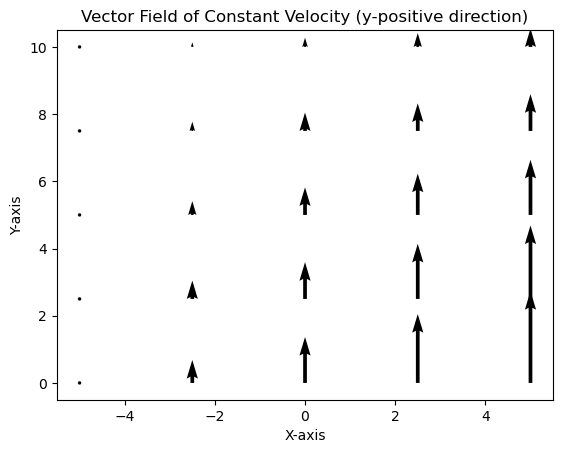

In [13]:
import numpy as np
import matplotlib.pyplot as plt
file_name = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\All outputs\compare\vector_field_test.txt'


X = np.linspace(-5, 5, 5)
Y = np.linspace(0, 10, 5)
x, y = np.meshgrid(X, Y)

u = np.zeros_like(x)
v = np.zeros_like(y)
for el in range(len(v)):
    v[el] = np.ones_like(v[el])*(len(v)-el)
    v[el] = np.arange(0, len(v[el]))*(len(v)-el)




data_to_save = np.column_stack((x.flatten(), y.flatten(), u.flatten(), v.flatten()))
np.savetxt(file_name, data_to_save, fmt='%f', delimiter='\t', header='x\ty\tu\tv')

# Plot the vector field
plt.quiver(x, y, u,v)
plt.title('Vector Field of Constant Velocity (y-positive direction)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()


In [29]:
import My_functions as Mf
import scipy
F_y = []
file_name = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\All outputs\compare\vector_field_test.txt'
control_volume_lengh = 400
sphere_diameter = 9.525/1000
sphere_location_relative_to_piv = 5
sphere_location_absolute = sphere_location_relative_to_piv+5
sphere_vel = 0


upper_location_rel = sphere_location_relative_to_piv + control_volume_lengh
lower_location_rel = sphere_location_relative_to_piv - control_volume_lengh

upper_location_absolute = sphere_location_absolute + control_volume_lengh
lower_location_absolute = sphere_location_absolute - control_volume_lengh

x, y, u, v = Mf.txt_to_column(file_name)

start_y_upper, end_y_upper = Mf.find_closest_range_to_values_in_array(y, y[0]) #return indexes
start_y_lower, end_y_lower = Mf.find_closest_range_to_values_in_array(y, y[-1]) #return indexes

start_x = Mf.find_closest_values_in_array(x, sphere_location_relative_to_piv - control_volume_lengh)
end_x = Mf.find_closest_values_in_array(x, sphere_location_relative_to_piv + control_volume_lengh)

v_upper = v[start_y_upper: end_y_upper + 1][start_x: end_x + 1] # [m/s]
v_lower = v[start_y_lower: end_y_lower + 1][start_x: end_x + 1] # [m/s]
x_values = x[start_x: end_x + 1] # [m]


#note: sphere_velocity[ind][1] is the control volume velocity V_c
w_squared_upper = (np.array(v_upper) - sphere_vel)**2 # [m^2 / s^2]
w_squared_lower = (np.array(v_lower) - sphere_vel)**2 # [m^2 / s^2]


sum_upper = np.trapz(w_squared_upper, x_values) # [m^3 / s^2]
sum_lower = np.trapz(w_squared_lower, x_values) # [m^3 / s^2]


sum_upper = scipy.integrate.trapz(w_squared_upper, x_values) # [m^3 / s^2]
sum_lower = scipy.integrate.trapz(w_squared_lower, x_values) # [m^3 / s^2]

interp_func_upper = lambda z: np.interp(z, x_values, w_squared_upper)
a = min(x_values)
b = max(x_values)
result_upper, error_upper = scipy.integrate.quad(interp_func_upper, a, b)
print("Numeric integral result:", result_upper)
print("Error estimate:", error_upper)

interp_func_lower = lambda z: np.interp(z, x_values, w_squared_lower)
a = min(x_values)
b = max(x_values)
result_lower, error_lower = scipy.integrate.quad(interp_func_lower, a, b)
print("Numeric integral result:", result_lower)
print("Error estimate:", error_lower)

sum_upper = scipy.integrate.simps(w_squared_upper, x_values) # [m^3 / s^2]
sum_lower = scipy.integrate.simps(w_squared_lower, x_values) # [m^3 / s^2]


# the force acting on the WATER:
F_y_el = 4*sphere_diameter*(1130*sum_upper - 1130*sum_lower) # [N]
F_y_el =(result_upper - result_lower) # [N]

F_y_el =(sum_upper - sum_lower) # [N]

# appending the force acting on the SPHERE not on the water:
F_y.append(-F_y_el)
F_y, sum_upper, sum_lower, v_upper, w_squared_upper, F_y_el

Numeric integral result: 1375.0
Error estimate: 1.5276668818842154e-11
Numeric integral result: 55.0
Error estimate: 6.128431095930864e-13


([-1280.0000000000002],
 1333.3333333333335,
 53.333333333333336,
 array([ 0.,  5., 10., 15., 20.]),
 array([  0.,  25., 100., 225., 400.]),
 1280.0000000000002)

In [30]:
F_y_el

1280.0000000000002

In [31]:
import sympy as sy
from sympy import symbols

# Define the variable
x = symbols('x')

# Define the function
f1 = 2*x+10
f2 = 2/5*x+2
display(f1.subs(x,5))

f11 = (f1-sphere_vel)**2
f22 = (f2-sphere_vel)**2


print([f11.subs(x, el) for el in x_values])

# Calculate the definite integral from 1 to 5
sy.integrate(f11, (x, -5, 5))-sy.integrate(f22, (x, -5, 5)), sy.integrate(f11, (x, -5, 5)).evalf(), sy.integrate(f22, (x, -5, 5)).evalf(), np.trapz(w_squared_upper, x_values)

20

[0, 25.0000000000000, 100, 225.000000000000, 400.000000000000]


(1280.00000000000, 1333.33333333333, 53.3333333333333, 1375.0)

In [107]:
import numpy as np
from scipy.integrate import quad

# Example lists of x and y values
x = [1, 2, 3, 4, 5]
y = np.array([2, 4, 6, 8, 10])
y1111 = y**2

# Create an interpolation function
interp_func = lambda z: np.interp(z, x, y1111)

# Define the integration limits
a = min(x)
b = max(x)

# Perform the integration
result, error = quad(interp_func, a, b)

# Display the result and error
print("Numeric integral result:", result)
print("Error estimate:", error)


Numeric integral result: 168.0
Error estimate: 1.866062859789963e-12


In [99]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad

# Example lists of x and y values
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create an interpolation function
interp_func = interp1d(x, y, kind='linear', fill_value='extrapolate')

# Define the integration limits
a = min(x)
b = max(x)

# Perform the integration
result, error = quad(interp_func, a, b)

# Display the result
print("Numeric integral result:", result)
print("Error estimate:", error)


Numeric integral result: 24.0
Error estimate: 2.6645352591003757e-13


c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


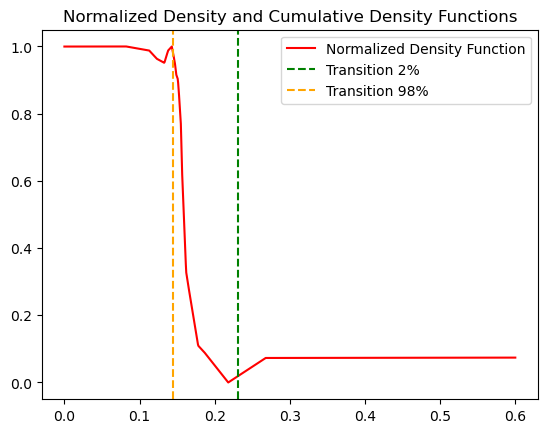

0.08708708708708707


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def find_interface_thickness_callable(x1, y1_callable, show=False):
    x = x1[::-1]
    y = y1_callable(x)  # Evaluate y using the callable function
    
    # Normalize the density values between 0 and 1
    normalized_y = (y - min(y)) / (max(y) - min(y))

    # Find the points corresponding to the 1% and 99% thresholds
    threshold_1 = 0.02
    threshold_2 = 0.98

    transition_point_1 = x[np.argmax(normalized_y <= threshold_1)]
    transition_point_2 = x[np.argmax(normalized_y >= threshold_2)]

    if show:
        # Plot the Density Function and CDF
        plt.plot(x, normalized_y, label='Normalized Density Function', color='red')
        plt.axvline(x=transition_point_1, linestyle='--', color='green', label='Transition 2%')
        plt.axvline(x=transition_point_2, linestyle='--', color='orange', label='Transition 98%')
        plt.legend()
        plt.title('Normalized Density and Cumulative Density Functions')
        plt.show()

    return abs(transition_point_1 - transition_point_2)

# Example usage with rho_1
import My_functions as Mf
y_loccccc, densityccccc = Mf.load_density_profile_from_excel(date='2024 01 08')
rho_function = Mf.create_callable_function_of_data(y_loccccc, densityccccc)

x_domain = np.linspace(0, 0.6, 1000)
result = find_interface_thickness_callable(x_domain, rho_function, show=True)
print(result)

# Otherss

In [115]:
#Find times of records
import os

import My_functions as Mf

def get_folder_names(folder_path):
    """Return the names of all folders in the given path."""
    return [os.path.join(folder_path, name) for name in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, name))]

the_main = Mf.select_directory()


folder_patyeey = get_folder_names(the_main)
the_asdas = []
the_asdas2 = []
for foldy in folder_patyeey:
    longy = len(Mf.find_pictures(foldy))
    frame_rate = Mf.read_data_from_cihx(foldy, return_number = True, return_int=True)
    date =  Mf.read_data_from_cihx(foldy, '<date>')
    the_asdas.append([int((os.path.basename(foldy))[-4:]),longy/frame_rate, date])
    the_asdas2.append([int((os.path.basename(foldy))[-4:]), longy/frame_rate])
print(the_asdas, len(the_asdas))
hala = np.array(the_asdas)[:,:2][:,1].tolist()
hala = np.array(the_asdas2)[:,1].tolist()
my_string = '\n'.join(map(str, hala))
# str(hala).replace("[", "").replace("]", "").split(",")
    # .split(","))
from pyperclip import copy
copy(my_string)
my_string
print('press cntrl c in excel')

ValueError: invalid literal for int() with base 10: 'cord'

## Pickle fixer

In [1]:
# Pickle and excel index comperator
r'''
set pickle index as excel's index
'''
import My_functions as Mf
import pandas as pd

pickle_location = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\The Big Pickle.pkl'
excel_pathy = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

the_pickle = Mf.load_pickle(pickle_location)
the_keys = the_pickle.keys()
the_keys = [key for key in the_keys if key != 'Object To Follow'] #remove object to follow

sphere_type = 'Sphere Type'
brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
sphere_density1 = 'Sphere density [kg/m^3]'
u_upper1 = 'Upper velocity [m/s]'
u_lower1 = 'Lower velocity [m/s]'



# Water - Glycerol
# Water - Salt

from_date = ['2024/1/21','2024/1/22','2024/1/23','2024/1/24','2024/2/22']
for key in the_keys:
    # if not the_pickle[key]['Experiment Date'] in from_date:
    current = the_pickle[key]
    print(current['First Frame'])
        # current['Solution'] = 'Water - Salt'
        # print(current['Solution'])
        

# print(current.keys())

r'''
ENABLE LINE BELOW TO APPLY CHANGES TO PICKLE FILE
'''
# Mf.save_pickle(pickle_location, the_pickle)


c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


KeyError: 'First Frame'

In [9]:
# Pickle and excel index comperator
r'''
set pickle index as excel's index
'''
import My_functions as Mf
import pandas as pd

pickle_location = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\The Big Pickle.pkl'
excel_pathy = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

the_pickle = Mf.load_pickle(pickle_location)
the_keys = the_pickle.keys()
the_keys = [key for key in the_keys if key != 'Object To Follow'] #remove object to follow

sphere_type = 'Sphere Type'
brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
sphere_density1 = 'Sphere density [kg/m^3]'
u_upper1 = 'Upper velocity [m/s]'
u_lower1 = 'Lower velocity [m/s]'



xls = pd.ExcelFile(excel_pathy)
df = pd.read_excel(excel_pathy)
selected_sheet_name = xls.sheet_names[0]

indexes = []
for key in the_keys:
    current = the_pickle[key]

    current_df = df[(df['Experiment Date'] == current['Experiment Date']) & (df['Experiment number'] == current['Experiment number']) & (df['Record number'] == current['Record number'])]
  
    # current['First Frame'] = current_df['First Frame'].iloc[0]
    # current['Frames Per Second'] = current_df['Frames Per Second'].iloc[0]
    # current['Scaling Factor [pixel/m]'] = current_df['Scaling Factor [pixel/m]'].iloc[0]
   


r'''
ENABLE LINE BELOW TO APPLY CHANGES TO PICKLE FILE
'''
# Mf.save_pickle(pickle_location, the_pickle)
xls.close()

<class 'numpy.int64'>


NameError: name 'stop' is not defined

## Pickle and excel index comperator

In [4]:
# Pickle and excel index comperator
r'''
set pickle index as excel's index
'''
import My_functions as Mf
import pandas as pd

pickle_location = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\The Big Pickle.pkl'
excel_pathy = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"

the_pickle = Mf.load_pickle(pickle_location)
the_keys = the_pickle.keys()
the_keys = [key for key in the_keys if key != 'Object To Follow'] #remove object to follow

sphere_type = 'Sphere Type'
brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
sphere_density1 = 'Sphere density [kg/m^3]'
u_upper1 = 'Upper velocity [m/s]'
u_lower1 = 'Lower velocity [m/s]'



xls = pd.ExcelFile(excel_pathy)
df = pd.read_excel(excel_pathy)
selected_sheet_name = xls.sheet_names[0]

indexes = []
for key in the_keys:
    current = the_pickle[key]
    filtered_df = df[(df['Experiment Date'] == current['Experiment Date']) & (df['Experiment number'] == current['Experiment number']) & (df['Record number'] == current['Record number'])]
    row_index = filtered_df.index[0]  # Assuming only one row satisfies the condition
    old_iii = current['Index']
    current['Index'] = df.at[row_index, 'Index']
    indexes.append(current['Index'])
    print(f' Old index = {old_iii} new = {current["Index"]}')
    if old_iii != current["Index"]:
        print('fix here')

   
   
    # if current["Index"] == 38:
        # print('oooooooooooooooooooooooooooooooook')

    # edit density
    # real_diameter = Mf.sphere_type_to_data(current[sphere_type])[0]
    # the_real_density =  Mf.find_sphere_rho(real_diameter, current[nu_u1], current[rho_u1], current[u_upper1])

    
    # current[sphere_diameter1] = real_diameter
    # current['Calculated sphere density [kg/m^3]'] = the_real_density
    # df.at[row_index, 'Sphere Diameter [m]'] = real_diameter
    # df.at[row_index, 'Calculated sphere density [kg/m^3]'] = the_real_density
  

# #update the excel?
# df.to_excel(excel_pathy, index=False, sheet_name=selected_sheet_name)
        

r'''
ENABLE LINE BELOW TO APPLY CHANGES TO PICKLE FILE
'''
# Mf.save_pickle(pickle_location, the_pickle)
xls.close()


# Find the minimum and maximum elements in the list
min_a = min(indexes)
max_a = max(indexes)

# Initialize a list to store missing elements
missing_elements = []

# Iterate over the range from min_a to max_a
for i in range(min_a, max_a + 1):
    if i not in indexes:
        missing_elements.append(i)

print("For list indexes, the missing elements are:", missing_elements)

 Old index = 0 new = 0
 Old index = 1 new = 1
 Old index = 2 new = 2
 Old index = 3 new = 3
 Old index = 4 new = 4
 Old index = 5 new = 5
 Old index = 6 new = 6
 Old index = 7 new = 7
 Old index = 8 new = 8
 Old index = 9 new = 9
 Old index = 10 new = 10
 Old index = 11 new = 11
 Old index = 12 new = 12
 Old index = 13 new = 13
 Old index = 14 new = 14
 Old index = 15 new = 15
 Old index = 16 new = 16
 Old index = 17 new = 17
 Old index = 92 new = 92
 Old index = 127 new = 127
 Old index = 123 new = 123
 Old index = 18 new = 18
 Old index = 124 new = 124
 Old index = 19 new = 19
 Old index = 125 new = 125
 Old index = 20 new = 20
 Old index = 21 new = 21
 Old index = 126 new = 126
 Old index = 22 new = 22
 Old index = 23 new = 23
 Old index = 24 new = 24
 Old index = 41 new = 41
 Old index = 42 new = 42
 Old index = 25 new = 25
 Old index = 26 new = 26
 Old index = 27 new = 27
 Old index = 28 new = 28
 Old index = 29 new = 29
 Old index = 56 new = 56
 Old index = 30 new = 30
 Old index

In [12]:
from numpy import pi
580e-6/(4/3*pi*(10.023/2000)**3)

1100.110171602074

In [8]:
from fractions import Fraction

def nicer_form(number):
    # Check if the number is close to a fraction
    frac = Fraction(number).limit_denominator()
    if abs(number - frac) < 1e-6:  # Adjust the tolerance level as needed
        return frac
    
    return number  # If no nicer form found, return the original number

# Example usage:
print(nicer_form(1e1/295))  # Output: 17/19
print(nicer_form(1.73))  # Output: sqrt(3)


2/59
173/100


calculated daiameter and density

In [ ]:
import My_functions as Mf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

from scipy.constants import g, pi

excel_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\TEST\Dimensionless Numbers PTV.xlsx'

r'''
'Experiment Date',
 'Experiment number',
 'Record number',
 'Sphere Type',
 'Sphere Diameter [m]',
 'Sphere density [kg/m^3]',
 'Upper density [kg/m^3]',
 'Lower density [kg/m^3]',
 'Upper viscosity [m^2/sec]',
 'Lower viscosity [m^2/sec]',
 'Upper velocity [m/s]',
 'Lower velocity [m/s]',
 'Minimum velocity [m/s]',
 'Upper Re',
 'Lower Re',
 'Upper Fr',
 'Lower Fr',
 'Brunt Number',
 'State',
 'Notes',
 'Data Processing Date',
 'Data Processing Hour',
 'Upper Ar',
 'Lower Ar']
'''

state_column = 'State'
date_column = 'Experiment Date'

brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
rho_u1 = 'Upper density [kg/m^3]'
rho_l1 = 'Lower density [kg/m^3]'
nu_u1 = 'Upper viscosity [m^2/sec]'
nu_l1 = 'Lower viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
sphere_density1 = 'Sphere density [kg/m^3]'
u_upper1 = 'Upper velocity [m/s]'
u_lower1 = 'Lower velocity [m/s]'



df = pd.read_excel(excel_path)

# # REMOVE ALL DATA THAT DOESNT HAVE U MIN
# df.dropna(subset=[U_min1], inplace=True)


color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing':  'green'}
df['color'] = df[state_column].map(color_mapping)

brunt = df[brunt1]
Re_u = df[Re_u1]
Re_l = df[Re_l1]
Fr_u = df[Fr_u1]
nu_u = df[nu_u1]
nu_l = df[nu_l1]
rho_u = df[rho_u1]
rho_l = df[rho_l1]
sphere_diameter = df[sphere_diameter1]
sphere_density = df[sphere_density1]
U_min = df[U_min1]
u_upper = df[u_upper1]

df['Calculated sphere density [kg/m^3]2'] = df.apply(lambda row: Mf.find_sphere_rho_with_unkown_diameter(row[nu_u1], row[rho_u1], row[u_upper1], row[nu_l1], row[rho_l1], row[u_lower1])[0], axis=1)
df['Calculated Sphere Diameter [m]2'] = df.apply(lambda row: Mf.find_sphere_rho_with_unkown_diameter(row[nu_u1], row[rho_u1], row[u_upper1], row[nu_l1], row[rho_l1], row[u_lower1])[1], axis=1)
df.to_excel(excel_path, index=False)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import My_functions as Mf

from scipy.constants import g, pi

excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\Excel Files\Dimensionless Numbers PTV.xlsx"


r'''
'Experiment Date',
 'Experiment number',
 'Record number',
 'Sphere Type',
 'Sphere Diameter [m]',
 'Sphere density [kg/m^3]',
 'Upper density [kg/m^3]',
 'Lower density [kg/m^3]',
 'Upper viscosity [m^2/sec]',
 'Lower viscosity [m^2/sec]',
 'Upper velocity [m/s]',
 'Lower velocity [m/s]',
 'Minimum velocity [m/s]',
 'Upper Re',
 'Lower Re',
 'Upper Fr',
 'Lower Fr',
 'Brunt Number',
 'State',
 'Notes',
 'Data Processing Date',
 'Data Processing Hour',
 'Upper Ar',
 'Lower Ar']
'''

state_column = 'State'
date_column = 'Experiment Date'

brunt1 = 'Brunt Number'
Re_u1 = 'Upper Re'
Re_l1 = 'Lower Re'
Fr_u1 = 'Upper Fr'
nu_u1 = 'Upper viscosity [m^2/sec]'
rho_u1 = 'Upper density [kg/m^3]'
U_min1 = 'Minimum velocity [m/s]'
sphere_diameter1 = 'Sphere Diameter [m]'
sphere_density1 = 'Sphere density [kg/m^3]'
u_upper1 = 'Upper velocity [m/s]'


df = pd.read_excel(excel_path)

# # REMOVE ALL DATA THAT DOESNT HAVE U MIN
# df.dropna(subset=[U_min1], inplace=True)


color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing':  'green'}
df['color'] = df[state_column].map(color_mapping)

brunt = df[brunt1]
Re_u = df[Re_u1]
Re_l = df[Re_l1]
Fr_u = df[Fr_u1]
nu_u = df[nu_u1]
rho_u = df[rho_u1]
sphere_diameter = df[sphere_diameter1]
sphere_density = df[sphere_density1]
U_min = df[U_min1]
u_upper = df[u_upper1]


# lambda df['Calculated sphere density [kg/m^3]'] : 
# df['Calculated sphere density [kg/m^3]'] = find_sphere_rho(sphere_diameter[index], nu_u[index], rho_u[index], u_upper[index])


df['Calculated sphere density [kg/m^3]'] = df.apply(lambda row: Mf.find_sphere_rho(row[sphere_diameter1], row[nu_u1], row[rho_u1], row[u_upper1]), axis=1)
df.to_excel(excel_path, index=False)

c:\Anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
c:\Anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
import My_functions as Mf
file_list = Mf.files_in_folder(r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\output\Multy', full_path=True)


import numpy as np
import napari
from napari import Viewer, gui_qt

# Function to read data from a file
def read_data(filename):
    a = np.loadtxt(filename)
    x, y, u, v, flags, mask = a[:, 0], a[:, 1], a[:, 2], a[:, 3], a[:, 4], a[:, 5]
    return x, y, u, v, flags, mask

# Function to create a Napari viewer with a single layer for vectors
def display_vector_fields(file_list):
    all_vectors = []

    for filename in file_list:
        x, y, u, v, flags, mask = read_data(filename)
        vectors = np.dstack((x, y, u, v))
        vectors = vectors.reshape((len(x), 2, 2))
        all_vectors.append(vectors)
  

    # Concatenate all vectors into a single array
    all_vectors = np.vstack(all_vectors)

    # Reshape vectors to match the required format (N, 2, D)
    all_vectors = all_vectors.reshape(-1, 2, 4)

display_vector_fields(file_list)

In [ ]:
import My_functions as Mf
daty = Mf.convert_date(Mf.read_data_from_cihx(Mf.select_directory(), pattern='<date>'))
y_loc, density = Mf.load_density_profile_from_excel(date=daty)
a = Mf.create_callable_function_of_data(y_loc, density)
a(0.27)

In [ ]:
import My_functions as Mf
print(Mf.display_images_with_points_napari(Mf.select_directory()))

Date colume fixer

In [ ]:
# Date colume fixer
import pandas as pd

# Read Excel file into a DataFrame

file_pathyyy = 1
# file_pathyyy = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Dimensionless Numbers PTV.xlsx"

df = pd.read_excel(file_pathyyy)

colommsmsm = 'Experiment Date'
# Display the current DataFrame
print("Original DataFrame:")
print(df)

# Assuming the date column is named 'date_column', you can fix the date format
# Replace 'date_column' with the actual name of your date column
df[colommsmsm] = pd.to_datetime(df[colommsmsm], errors='coerce')

# Update the date format as needed
date_format = '%Y/%m/%d'  # Replace with the desired date format
df[colommsmsm] = df[colommsmsm].dt.strftime(date_format)


# Save the upda r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Dimensionless Numbers PTV.xlsx"ted DataFrame to a new Excel file if needed

df.to_excel(file_pathyyy, index=False)


In [ ]:
import numpy as np
np.round(5.1)
int(np.ceil(5.1))

In [ ]:
'ok'
import My_functions as Mf
pic_num, locccc, data_object, data_PTV, contrast_limits = Mf.select_circle_napari_advance(foldy)
locccc

In [ ]:
pivyt = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 28\C001H001S0013\C001H001S0013000058.tif"
save_loc= r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\object_to_follow.pkl'

In [ ]:
picyst = Mf.read_image(pivyt)
Mf.save_pickle(save_loc, [picyst[data_object], locccc, data_object, data_PTV])
asda = Mf.load_pickle(save_loc)
Mf.display_images_with_napari_recive_list([asda[0]])

In [ ]:
import My_functions as Mf

Mf.track_object_series_auto(r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 12 28\C001H001S0013")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

excel_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Dimensionless Numbers PTV.xlsx"
the_x_column = 'Upper Re'
the_y_column = 'Lower Re'
state_column = 'State'
date_column = 'Date'  # Replace 'Date' with the actual column name containing dates
date_column = 'Experiment Date'


df = pd.read_excel(excel_path)
color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing': 'violet'}

# Convert the entire 'Date' column to datetime
df[date_column] = pd.to_datetime(df[date_column])

# Original code without perceptron
df['color'] = df[state_column].map(color_mapping)

unique_dates = df['Experiment Date'].dt.date.unique()
# Create a dictionary for mapping states to markers
date_marker_mapping = {date: marker for date, marker in zip(unique_dates, ['o', 's', 'D', 'v', '^', '<', '>', 'P', 'X', '*'])}

counter = 0
# Group by date and state, then plot with different markers and colors
fig, ax = plt.subplots(figsize = (10,10))
for (date, state), group in df.groupby([date_column, state_column]):
    counter += len(group)
    # print(group['Record number'])
    date_str = str(date.date())  # Convert timestamp to string
    marker = date_marker_mapping.get(date.date(), 'o')  # Provide a default marker if not found in the mapping
    color = color_mapping[state]
    ax.scatter(group[the_x_column], group[the_y_column], c=color, alpha=0.7, marker=marker, label=f"{date_str}")



legend_handles = [Line2D([0], [0], marker=date_marker_mapping.get(date, 'o'), color='w', markerfacecolor='gray', markersize=10, label=str(date)) for date in unique_dates]
legend_labels2 = ['minimum', 'no - minimum', 'bouncing']
legend_handles2 = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10, label=label) for label in legend_labels2]

legend_handles = legend_handles+legend_handles2
ax.legend(handles=legend_handles, title=f"{date_column}")




plt.xlabel(the_x_column)
plt.ylabel(the_y_column)
plt.show()
print('sanity check' , counter, len(df))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'x' and 'y' are your data
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])

# Fit a line (degree 1) to the data
p = np.polyfit(x, y, 1)

# Generate y values for the fitted line
y_fit = p[0]*x + p[1]

# Create the scatter plot
plt.scatter(x, y, color='blue')

# Add the fitted line
plt.plot(x, y_fit, color='red')

# Display the plot
plt.show()


In [ ]:
from scipy.constants import pi, g
import sympy as sy
from scipy.optimize import fsolve
import numpy as np

sphere_diameter = 9.525/1000 #[m]
sphere_density = 1128 #[kg/m^3]
fluid_density = 1120 #[kg/m^3]
nu1 = 1.56347e-06 #[m^2/s]

rho_f, rho_s, a, U, Ab, Vb, g1, nu = sy.symbols('rho_f, rho_s, a, U, A_b, V_b, g, nu')

Ab1 = sy.pi*a**2/4 #the projected surface area
Re = U*a/nu
Cd = 0.4 + 24/Re + 6/(1+sy.sqrt(Re))

Fd = Cd*rho_f*U**2*Ab/2
F_B = rho_f*Vb*g1
MG = rho_s*g1*Vb

the_eq = Fd+F_B-MG


sphere_volume = 4/3*pi*(sphere_diameter/2)**3 #sphere volume [m^3]

the_eq_1 = the_eq.subs([(rho_f, fluid_density), (rho_s, sphere_density),
                    (nu, nu1), (Vb, sphere_volume), (Ab, Ab1),(a, sphere_diameter), (g1, g)])
equa1 = sy.lambdify(U, the_eq_1, "numpy")
the_veloci_1 = fsolve(equa1, 1)
the_veloci_1 = the_veloci_1[0]

Re1 = the_veloci_1*sphere_diameter/nu1

def settling_velocity(fluid_density = fluid_density, sphere_density = sphere_density, nu1 = nu1, Ab1=Ab1, sphere_diameter=sphere_diameter, g=g):
    sphere_volume = 4/3*pi*(sphere_diameter/2)**3 #sphere volume [m^3]
    
    the_eq_1 = the_eq.subs([(rho_f, fluid_density), (rho_s, sphere_density),
                    (nu, nu1), (Vb, sphere_volume), (Ab, Ab1),(a, sphere_diameter), (g1, g)])
    equa1 = sy.lambdify(U, the_eq_1, "numpy")
    the_veloci_1 = fsolve(equa1, 1)
    the_veloci_1 = the_veloci_1[0]
    return the_veloci_1

rhos = np.linspace(1128, 1134)
ds = np.linspace(9.525/1000, 10/1000)


wp1 = []
for rhop in rhos:
    sol = settling_velocity(sphere_density = rhop)
    wp1.append(sol)

wp2 = []
for d in ds:
    sol = settling_velocity(sphere_diameter = d)
    wp2.append(sol)


import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].plot(rhos, wp1)
ax[1].plot(ds, wp2)
# plt.xlabel('$\rho_p$ (kg/m$^3$)')
# plt.ylabel('$w_p$ (m/s)')
plt.show()

In [ ]:
import numpy as np
import My_functions as Mf
scaling_factor = 3020.235578375113
pic_folder = Mf.select_directory()
sphere_location_pixel = Mf.track_object_series(pic_folder,fft=True,
												image_number = 44,
												sphere_location = [505, 144],
												Object_data = [[469, 113], [469, 186], [539, 186], [539, 113]],
												PTV_data = [[375, 0], [375, 1024], [608, 1024], [608, 0]])
Mf.display_images_with_points_napari(pic_folder, sphere_location_pixel, title = 'Verify sphere location')
sphere_location_meter = Mf.transform_coordinates_physical(sphere_location_pixel, pic_folder, scaling_factor, origin_point=[0, 1024])
wanted_velocity_uncertainty = 0.001 #[m/s]
scaling_factor_uncertainty = 10 #[pixel/m]
location_uncertainty_pixel = 3 #[pixel]
dt = 1/60


In [ ]:
velocitys_skipped = Mf.calc_velocity_from_skipped_cells(sphere_location_meter, dt, skipped_dt)



# velocities_y_skipped_meter = velocitys_skipped[:,1]
sphere_location_skipped_meter = Mf.skip_cells(sphere_location_meter, round(skipped_dt/dt), always_include_last = False)

sphere_location_skipped_plot = np.array(sphere_location_skipped_meter)
sphere_velocity_skipped_plot = np.array(velocitys_skipped)
y_axis_skipped = sphere_location_skipped_plot[:, 1]
y_velocity_skipped = sphere_velocity_skipped_plot[:, 1]

v_1 = min(y_velocity_skipped)
y_velocity_skipped_normalized = y_velocity_skipped/v_1
velocity_acceptable_error_normalized = wanted_velocity_uncertainty/v_1


y_axis_normalized = y_axis_skipped[:-1]

#plot velocity
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("sphere y velocity skipped by "+str(round(skipped_dt/dt)), fontsize = 22)
plt.plot(y_axis_normalized, y_velocity_skipped_normalized,'-o', label='velocity')
plt.fill_between(y_axis_normalized, y_velocity_skipped_normalized + velocity_acceptable_error_normalized,
                  y_velocity_skipped_normalized - velocity_acceptable_error_normalized, color='r', alpha=0.4, label='95% certainty')
# Add text at the minimum point
min_index = np.argmin(y_velocity_skipped_normalized)
plt.text(y_axis_normalized[min_index], y_velocity_skipped_normalized[min_index],
        f'Minimum Point\n({y_axis_normalized[min_index]:.2f}, {y_velocity_skipped_normalized[min_index]:.2f})', 
        horizontalalignment='center', verticalalignment='top', fontsize=12)
plt.xlabel(r'$\mathit{y}\ [m]$', fontsize = 18)
plt.ylabel(r'$\mathit{\frac{v} {v_{1}}}$', fontsize = 20, rotation=0)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.gca().invert_xaxis()
plt.legend(fancybox=True, framealpha=0)
plt.show()





sphere_location_skipped_meter = Mf.skip_cells(sphere_location_meter, round(skipped_dt/dt))
# velocitys_skipped = Mf.calc_velocity_from_acceptable_error(sphere_location_meter, scaling_factor, dt, wanted_velocity_uncertainty, scaling_factor_uncertainty, location_uncertainty_pixel)
velocitys_skipped = Mf.calc_velocity_from_skipped_cells(sphere_location_meter, dt, skipped_dt)


y_velocity_skipped_added_point = np.append(velocitys_skipped, [velocitys_skipped[-1]], axis=0)
velocitys_meter = Mf.interpolate_between_points_2d(sphere_location_skipped_meter, y_velocity_skipped_added_point, sphere_location_meter, factor = round(skipped_dt/dt))
if len(velocitys_meter)<len(sphere_location_meter):
    velocitys_meter = np.vstack([velocitys_meter, np.tile(velocitys_meter[-1], (len(sphere_location_meter)-len(velocitys_meter), 1))])
    print(f'The last {len(sphere_location_meter)-len(velocitys_meter)+1:.2f} Point were added to the velocity to match y_axis lenght. thier value is:', velocitys_meter[-1].tolist())

    
fig, ax = plt.subplots(figsize=(10,10))
plt.title("sphere y velocity skipped by "+str(round(skipped_dt/dt)) + ' extended point to complete y_axis')
plt.plot(y_axis_skipped[:-1], y_velocity_skipped, 'o-', label='Skipped Data')
plt.fill_between(y_axis_skipped[:-1], y_velocity_skipped + wanted_velocity_uncertainty, y_velocity_skipped - wanted_velocity_uncertainty, color='red', alpha=0.2, label='95% certainty')
plt.plot(sphere_location_meter[:,1], velocitys_meter[:,1], '--', color = 'black', label='Extended Data')




ax.set_xlabel('y location [m]')
ax.set_ylabel('y velocity [m/s]')
plt.legend()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#!/usr/bin/env python3

"""Glycerol_calculator.py"""

## This python code is based on the MatLab code orginaly provided by Chris Westbrook
## http://www.met.reading.ac.uk/~sws04cdw/viscosity_calc.html

__author__  = "Matthew Partridge"
__license__ = "GPL"
__version__ = "1.0"
__credits__ = "Chris Westbrook"


#Required packages ----------------

import numpy
import math


#Variables ----------------

T = 20 				#temperature (degrees Celcius)
waterVol = 3 		#volume of water required (ml)
glycerolVol = 0.75	#volume of Glycerol used (ml)


#Densities ----------------

glycerolDen = (1273.3-0.6121*T)/1000 			#Density of Glycerol (g/cm3)
waterDen = (1-math.pow(((abs(T-4))/622),1.7)) 	#Density of water (g/cm3)


#Fraction cacluator ----------------

glycerolMass=glycerolDen*glycerolVol
waterMass=waterDen*waterVol
totalMass=glycerolMass+waterMass
mass_fraction=glycerolMass/totalMass
vol_fraction= glycerolVol/(glycerolVol+waterVol)

print ("Mass fraction of mixture =", round(mass_fraction,5))
print ("Volume fraction of mixture =", round(vol_fraction,5))


#Density calculator ----------------

##Andreas Volk polynomial method
contraction_av = 1-math.pow(3.520E-8*((mass_fraction*100)),3)+math.pow(1.027E-6*((mass_fraction*100)),2)+2.5E-4*(mass_fraction*100)-1.691E-4
contraction = 1+contraction_av/100

## Distorted sine approximation method
#contraction_pc = 1.1*math.pow(math.sin(numpy.radians(math.pow(mass_fraction,1.3)*180)),0.85)
#contraction = 1 + contraction_pc/100

density_mix=(glycerolDen*vol_fraction+waterDen*(1-vol_fraction))*contraction

print ("Density of mixture =", round(density_mix,5),"g/cm3")


#Viscosity calcualtor ----------------

glycerolVisc=0.001*12100*numpy.exp((-1233+T)*T/(9900+70*T))
waterVisc=0.001*1.790*numpy.exp((-1230-T)*T/(36100+360*T))

a=0.705-0.0017*T
b=(4.9+0.036*T)*numpy.power(a,2.5)
alpha=1-mass_fraction+(a*b*mass_fraction*(1-mass_fraction))/(a*mass_fraction+b*(1-mass_fraction))
A=numpy.log(waterVisc/glycerolVisc)

viscosity_mix=glycerolVisc*numpy.exp(A*alpha)

print ("Viscosity of mxiture =",round(viscosity_mix,5), "Ns/m2")



In [ ]:
min(y_velocity_skipped)

In [ ]:
import numpy as np


# Assuming 'locations' is your list of location points
locations = np.array(sphere_location_meter[:,1])  # Convert list to numpy array for vectorized operations

# Initialize an empty list to store the coefficients of the fitted lines
coefficients = []

# Loop over the locations with a sliding window of size 5
nnn = 40
for i in range(len(locations) - nnn):
    # Extract the five neighboring points
    window = locations[i:i+nnn+1]
    
    # Fit a least-squares line through the points
    coeff = np.polyfit(np.arange(0,(nnn+1)/60,1/60), window, 1)[0]
    
    # Append the coefficients to the list
    coefficients.append(coeff)

print(len(coefficients), len(sphere_location_meter[:,1][nnn:]))
#plot location
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Sphere's absolute location")
plt.scatter(sphere_location_meter[:,1][nnn:], coefficients)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import numpy as np
coefficients = []

nnn = 40

# Assuming locations is a 1D array or list
locations = np.array(locations)

# Generate indices for the sliding windows
indices = np.arange(len(locations) - nnn)

# Extract all windows at once
windows = locations[np.arange(nnn+1) + indices[:, None]]

# Fit least-squares lines through the points
coeffs = np.polyfit(np.arange(0, (nnn+1)/60, 1/60), windows.T, 1)

# Append the coefficients to the list
coefficients.extend(coeffs[0])

print(len(coefficients), len(sphere_location_meter[:,1][nnn:]))
#plot location
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Sphere's absolute location")
plt.scatter(sphere_location_meter[:,1][nnn:], coefficients)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()


In [ ]:
indices[:, None]+[1,2,3]

In [ ]:
np.arange(nnn+1)

In [ ]:
windows

In [ ]:
np.sqrt(12/(nnn*(nnn+1)*(nnn+2)))*2/(1/60)*.3/480

In [ ]:
velocity_acceptable_error = 0.001
window_size = 0.3
dt = 1/60
location_uncertainty_pixel = 2


P = 12/(velocity_acceptable_error*dt*480/(location_uncertainty_pixel*window_size))**2
coefficients = [1, 3, 2, -P]
roots = np.roots(coefficients)
real_roots = round(roots[np.isreal(roots)].real[0])

print("Real Roots:", real_roots)


In [ ]:

def location_with_respect_to_velocity(locations : np.ndarray[np.float64] | list, dt = 1/60, velocity_acceptable_error = 0.001, location_uncertainty_pixel = 2):
    neighboring_points = 40
    averaged_locations = []
    for i in range(len(locations) - neighboring_points):
        window = locations[i:i+neighboring_points+1]
        averaged_location = np.mean(window, axis=0)
        averaged_locations.append(averaged_location)
    return np.array(averaged_locations)


a = location_with_respect_to_velocity(sphere_location_meter[:,1])
len(a), len(coefficients)

In [ ]:
import My_functions as Mf
import numpy as np
sphere_location_meter = np.arange(0,500+1,1)
print(Mf.neighboring_points_from_velocity_acceptable_error(dt=1/60, velocity_acceptable_error=0.0001, location_uncertainty_pixel = 2))
y_velocity_meter = Mf.calc_velocity_least_squares_lines(sphere_location_meter, dt=1/60, velocity_acceptable_error=0.0001, location_uncertainty_pixel = 2)
y_location_cutted = Mf.location_with_respect_to_velocity(sphere_location_meter, dt=1/60, velocity_acceptable_error=0.0001, location_uncertainty_pixel = 2)
y_location_cutted

In [ ]:
locations = np.arange(7,7+10+1,1)
print(locations)
neighboring_points = 6+1

averaged_locations = []
for i in range(len(locations) - neighboring_points+1):
    window = locations[i:i+neighboring_points]
    print(window)
    averaged_location = np.mean(window, axis=0)
    averaged_locations.append(averaged_location)

len(averaged_locations)

In [ ]:
import numpy as np

def interpolate_between_points(x, y, full_list):
    r'''
    Fills the missing data points of y_interpolated_points.
    '''
    y_interpolated = []
    
    for i in range(len(x) - 1):
        x_pair = [x[i], x[i + 1]]
        y_pair = [y[i], y[i + 1]]
        
        # Calculate the number of points to interpolate based on the gap between x values
        num_points_to_interpolate = int(np.round((x[i + 1] - x[i]) / (x[1] - x[0])))
        
        # Interpolate between x values
        x_extended_pair = np.linspace(x_pair[0], x_pair[1], num_points_to_interpolate + 1)
        y_extended_pair = np.interp(x_extended_pair, x_pair, y_pair, period=360)
        
        # Append the interpolated points to the result
        y_interpolated.extend(y_extended_pair[:-1])
    
    return y_interpolated

# Example usage:
x_values = np.array([0, 1, 2, 4, 5])
y_values = np.array([0, 2, 1, 3, 2])
full_list = np.array([0, 0.1 ,0.5, 2,1.8, 1, 3, 2, 5])  # Adjust the range based on your data

result = interpolate_between_points(x_values, y_values, full_list)
print(result)


In [ ]:
import numpy as np

def interpolate_between_points(x, y, full_list):
    r'''
    Fills the missing data points of y_interpolated_points.
    '''
    y_interpolated = []
    i = 0
    
    for target_x in full_list:
        while i < len(x) - 1 and x[i + 1] < target_x:
            i += 1
        
        x_pair = [x[i], x[i + 1]]
        y_pair = [y[i], y[i + 1]]
        
        # Interpolate between x values
        y_interpolated_point = np.interp(target_x, x_pair, y_pair, period=360)
        
        # Append the interpolated point to the result
        y_interpolated.append(y_interpolated_point)
    
    return y_interpolated

# Example usage:
x_values = np.array([0, 1, 2, 4, 5])
y_values = np.array([0, 2, 1, 3, 2])
full_list = np.array([0, 0.1 ,0.5, 2,1.8, 1, 3, 2, 5, 4.5])  # Adjust the range based on your data

result = interpolate_between_points(x_values, y_values, full_list)
print(result)


In [ ]:
number = 5.3

# Round up without using math module
rounded_up = -(-number // 1)
rounded_up, round(number)

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Assuming 'locations' is your list of location points
locations = np.array(sphere_location_meter[:,1])  # Convert list to numpy array for vectorized operations

# Define the model function for a line
def model_func(x, a, b):
    return a * x + b

# Initialize an empty list to store the coefficients of the fitted lines
coefficients = []

# Loop over the locations with a sliding window of size 50
nnn = 20
for i in range(len(locations) - nnn):
    # Extract the neighboring points
    window = locations[i:i+nnn+1]
    
    # Fit a least-squares line through the points
    popt, pcov = curve_fit(model_func, np.arange(0,(nnn+1)/60,1/60), window)
    
    # Append the coefficients to the list
    coefficients.append(popt[0])  # popt[0] is the slope of the fitted line
print(len(coefficients), len(sphere_location_meter[:,1][nnn:]))
#plot location
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
plt.title("Sphere's absolute location")
plt.scatter(sphere_location_meter[:,1][nnn:], coefficients)
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from numpy import pi
from scipy.constants import g
rho_sphere = 1128
sphere_diameter = 9.525/1000

sphere_volume = 4/3*pi*(sphere_diameter/2)**3
sphere_mass = rho_sphere*sphere_volume
mg_base = sphere_mass*g

rho_sphere = 1136
sphere_diameter = 9.525/1000

sphere_volume = 4/3*pi*(sphere_diameter/2)**3
sphere_mass = rho_sphere*sphere_volume
mg_1 = sphere_mass*g


mg_1/mg_base*100

rho_sphere = 1128
sphere_diameter = 9.7/1000

sphere_volume = 4/3*pi*(sphere_diameter/2)**3
sphere_mass = rho_sphere*sphere_volume
mg_2 = sphere_mass*g
mg_2/mg_base*100


In [ ]:
from math import pi
a1 = 9.525/1000
m1 = 4/3*pi*(a1/2)**3*1134
print(4/3*pi*(a1/2)**3*1134)
a2 = 5/1000
m2 = 4/3*pi*(a2/2)**3*7840
print(4/3*pi*(a2/2)**3*1220)
m1-m2

In [ ]:
1134*(9.525/5)**3

In [ ]:
0.01/0.000001/60/60

assing variables with string

In [ ]:
caty = 'the cat'
cathu = 95
globals()[caty.replace(' ', '_')] = cathu
the_cat
for i in range(5):
    globals()['a'+str(i)] = i**2
a0,a1,a2,a3,a4

In [ ]:
excel_path=r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Dimensionless Numbers PTV.xlsx"

the_x_column='Upper Re'
the_y_column='Lower density [kg/m^3]'
state_column='State'
title=None

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd

df = pd.read_excel(excel_path)

color_mapping = {'minimum': 'red', 'no - minimum': 'blue', 'bouncing': 'violet'}

# Sphere density [kg/m^3] Upper density [kg/m^3] Lower density [kg/m^3] Upper viscosity [m^2/sec] Lower viscosity [m^2/sec] Upper Re Lower Re Upper Fr Lower Fr Brunt Number State

sphere_density = df['Sphere density [kg/m^3]']
upper_density = df['Upper density [kg/m^3]']
lower_density = df['Lower density [kg/m^3]']
upper_nu = df['Upper viscosity [m^2/sec]']
lower_nu = df['Lower viscosity [m^2/sec]']
upper_Re = df['Upper Re']
lower_Re = df['Lower Re']
upper_Fr = df['Upper Fr']
lower_Fr = df['Lower Fr']

In [ ]:
x = lower_density/sphere_density
y = lower_Re

line_equation = 0
# Original code without perceptron
df['color'] = df[state_column].map(color_mapping)
plt.scatter(x, y, c=df['color'], alpha=0.7)

# Create legend without perceptron using color dots
legend_labels = ['minimum', 'no - minimum', 'bouncing']
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10, label=label) for label in legend_labels]
plt.legend(handles=legend_handles)

if title is not None:
    plt.title(title)
plt.xlabel(the_x_column)
plt.ylabel(the_y_column)
plt.show()

In [ ]:
from openpyxl import load_workbook

import My_functions as Mf
import pandas as pd
import datetime
import os

dimensionless_numbers_path_excel = r"C:\Users\Morten\Desktop\TST2.xlsx"
experiment_date = 1
run_number= 1
sphere_type= 1
sphere_diameter= 1
sphere_rho= 1
upper_density= 1
lower_density= 1
upper_viscosity= 1
lower_viscosity= 1

upper_Re= 1
lower_Re= 1
upper_Fr= 1
lower_Fr= 1
Brunt_number= 1
state = 1

# Load the workbook
book = load_workbook(dimensionless_numbers_path_excel)

# Select the worksheet
sheet = book.active

# Define your dictionary
data_dict = {'Column1': 'Value1', 'Column2': 'Value2', 'Column3': 'Value3'}

data_dict = {'Added Date': datetime.date.today().strftime("%Y/%m/%d"), 'Experiment Date': experiment_date, 'Record number': run_number, 'Sphere Type':sphere_type,
            'Sphere Diameter [m]':sphere_diameter, 'Sphere density [kg/m^3]':sphere_rho, 'Upper density [kg/m^3]':upper_density,
            'Lower density [kg/m^3]':lower_density, 'Upper viscosity [m^2/sec]':upper_viscosity, 'Lower viscosity [m^2/sec]':lower_viscosity,
            'Upper Re': upper_Re, 'Lower Re': lower_Re, 'Upper Fr': upper_Fr, 'Lower Fr': lower_Fr, 'Brunt Number': Brunt_number, 'State': state}


# Append the data
data_list = list(data_dict.values())
sheet.append(data_list)

# Save the workbook
book.save(dimensionless_numbers_path_excel)


In [ ]:

import pandas as pd
file_path = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Shared Folder\TEST.xlsx"
desired_row = '2023-12-19'
base_column = 'date'
data_column = 'ha'
second_row = None

all_sheets = pd.read_excel(file_path, sheet_name=None)


print("Sheet names:", list(all_sheets.keys()))

for sheet_name, sheet_df in all_sheets.items():

    sheet_df[base_column] = pd.to_datetime(sheet_df[base_column]).dt.date
    filtered_df = sheet_df[sheet_df[base_column] == pd.to_datetime(desired_row).date()]

    if not filtered_df.empty:
        print(len(filtered_df))
        if len(filtered_df) > 1 and second_row in not None:
            the_data = filtered_df.iloc[0][data_column]
        else:
            the_data = filtered_df.iloc[0][data_column]
        print(f"Sheet: {sheet_name}, The upper fluid viscosity corresponding to {desired_row} is: {the_data}")



In [ ]:
from math import pi
d = 9.570 # mm
d /= 1e3
r = d/2
m = 519.8 #mg
m /= 1e6 #kg
V = 4/3*pi*r**3
rho = m/V
rho

In [ ]:
import My_functions as Mf

the_pic = Mf.read_image(Mf.select_file())

im_a12 = Mf.high_pass_filter(the_pic)


im_a123 = Mf.edge_enhancement(the_pic)
im_a1234 = Mf.edge_enhancement(im_a12)
Mf.display_images_with_napari_recive_list([the_pic, im_a1234], title='Before and after filter')

high pass filter

In [ ]:
import My_functions as Mf
a = r"C:\Users\Morten\Desktop\C001H001S0004000001.tif"
# "C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0006000314.tif"
im_a12 = Mf.high_pass_filter(Mf.read_image(a))


Mf.display_images_with_napari_recive_list([Mf.read_image(a), im_a12])

In [ ]:
import matplotlib.pyplot as plt

# Create a simple plot
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]
plt.plot(x, y, label='Linear Function')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Matplotlib Plot')

# Add a legend
plt.legend()

pathooooo = r"C:\Users\Morten\Desktop\H.ps"
# Save the plot as a PS file
plt.savefig(pathooooo, format='ps')

# Show the plot (optional)
plt.show()


In [ ]:
import numpy as np

# Define the two dots
dot1 = np.array([0.24, 0.0005])
dot2 = np.array([0.17, -0.00015])

mass = 0.0005131054527515398
# Calculate the slope and intercept
m11 = (dot2[1] - dot1[1]) / (dot2[0] - dot1[0])
m11 /= mass
b = dot1[1] - m11 * dot1[0]
b /= mass

# Print the line equation in slope-intercept form
print(f"Line equation: y = {m11:.4f}x + {b:.4f}")


In [ ]:
import sympy as sy
from sympy import symbols, pi
V,m = symbols('V, m')

V1 = 200/1e6
m1 = 1.130/4

rho = m/V
display(rho)
# error = abs(sy.diff(rho, V)*(1/1000/1000)/sy.sqrt(12)) + abs(sy.diff(rho, m)*(0.1/1e6)/sy.sqrt(12))
error = abs(sy.diff(rho, V)*(1/1e6)/sy.sqrt(12)) + abs(sy.diff(rho, m)*(0.1/1e3)/sy.sqrt(12))
display(error)
print( f'{m1/V1}, with error of {error.subs(V, V1).subs(m, m1).evalf()}')

In [ ]:
import os
int(os.path.splitext(os.path.basename("/path/to/C001H001S0010000856.tif"))[0][-5:])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = x  # Sample data for the left axis in [N]
y2 = 2.8 * x**2 +15 # Sample data for the right axis in [m]

# Create a figure and left axis
fig, ax1 = plt.subplots()

# Plot the data for the left axis
ax1.plot(x, y1, color='blue', label='Left Axis [N]')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Left Axis [N]', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin axis for the right axis
ax2 = ax1.twinx()

# Plot the data for the right axis
ax2.plot(x, y2, color='red', label='Right Axis [m]')
ax2.set_ylabel('Right Axis [m]', color='red')
ax2.tick_params('y', colors='red')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()


# checking control volume, editing the values

In [ ]:
import My_functions as Mf
import numpy as np
from openpiv import tools

path = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_000.txt'
path_save = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_001.txt'
x,y,u,v = Mf.txt_to_list(path)
x,y,u,v = Mf.txt_to_column(path)

upper = 0.03772349378386995
lower = -0.00037650621613004656
start_x, end_x = 1, 16

start_y_upper, end_y_upper = Mf.find_closest_range_to_values_in_array(y, upper) #return indexs
start_y_lower, end_y_lower = Mf.find_closest_range_to_values_in_array(y, lower) #return indexs

v_upper = v[start_y_upper: end_y_upper][start_x: end_x] # [m/s]
v_lower = v[start_y_lower: end_y_lower][start_x: end_x] # [m/s]

print(v_lower)
v[start_y_upper: end_y_upper][start_x: end_x] = np.ones(len(v[start_y_upper: end_y_upper][start_x: end_x]))*0.5
v[start_y_lower: end_y_lower][start_x: end_x] = np.ones(len(v[start_y_upper: end_y_upper][start_x: end_x]))

print(v[start_y_upper: end_y_upper][start_x: end_x])

tools.save(path_save, x, y, u, v, fmt='%.16e', delimiter='\t')

In [ ]:
x1,y1,u1,v1 = Mf.txt_to_list(path)
len(x1[0])
print(x1[0][1: 16], len(x1[0][1: 16]))
print(x1[0], len(x1[0]))

In [ ]:
import My_functions as Mf
from openpiv import tools
import scipy
# path = Mf.select_file()
# print(path)
path = r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/output/test/multy_000.txt'
path_read = path_save
window_size = 18 # pixels
search_area_size = window_size # pixels 
overlap = round(search_area_size/2) # pixels
scale = 0.04 # scale defines here the arrow length
width = 0.003 # width is the thickness of the arrow
threshold = 1.1


tools.display_vector_field(path_read, scale=4, width=width)
x,y,u,v = Mf.txt_to_column(path_read)

sphere_diameter = 0.009525
rho_1 = 1120
rho_2 = 1130

upper = 0.03772349378386995
lower = -0.00037650621613004656
start_x, end_x = 1, 16
sphere_y_vel = -0.028237966209754606

start_y_upper, end_y_upper = Mf.find_closest_range_to_values_in_array(y, upper) #return indexs
start_y_lower, end_y_lower = Mf.find_closest_range_to_values_in_array(y, lower) #return indexs

x_values = x[start_x: end_x] # [m]

v_upper = v[start_y_upper: end_y_upper][start_x: end_x] # [m/s]
v_lower = v[start_y_lower: end_y_lower][start_x: end_x] # [m/s]

w_squared_upper = (np.array(v_upper)-sphere_y_vel)**2 # [m^2 / s^2]
w_squared_lower = (np.array(v_lower)-sphere_y_vel)**2 # [m^2 / s^2]

sum_upper = scipy.integrate.trapz(w_squared_upper, x_values) # [m^3 / s^2]
sum_lower = scipy.integrate.trapz(w_squared_lower, x_values) # [m^3 / s^2]


# the force acting on the WATER:
F_y_el = 4*sphere_diameter*(rho_1*sum_upper - rho_2*sum_lower) # [N]

the_rounder


In [ ]:
import My_functions as Mf


a = [[395.1, 477.9649494], [395.0, 550.9849491915984], [465.0, 550.0], [465.0, 477.0]]




Mf.convert_2d_list_to_ints(a)

In [ ]:
import numpy as np
b_array = np.array([[1, 2],[3, 4],[5, 6]])
result_array = np.vstack([b_array, np.tile([10, 10], (55, 1))])
result_array

In [ ]:
import cv2
import My_functions as Mf
import numpy as np
import matplotlib.pyplot as plt


def find_brightest_spot(image_path, max_val1 = 200, alpha = 3, beta = 50, lower_limit = 120, upper_limit = 225):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    
# Apply contrast adjustment
    adjusted_image = np.clip(gray_image, lower_limit, upper_limit)
    normalized_image = (adjusted_image - lower_limit) / (upper_limit - lower_limit)
    normalized_image = normalized_image * 255
    adjusted_image = normalized_image
    # gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)


    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(adjusted_image)

                    # # If there are multiple bright spots, adjust the image contrast
                    # while max_val > max_val1:  # You can adjust this threshold based on your image
                    #     # Apply contrast adjustment
                    #     adjusted_image = np.clip(gray_image, lower_limit, upper_limit)
                    #     normalized_image = (adjusted_image - lower_limit) / (upper_limit - lower_limit)
                    #     normalized_image = normalized_image * 255
                        
                    #     # alpha = alpha  # Contrast control (1.0 means no change)
                    #     # beta = beta    # Brightness control
                    #     # adjusted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

                    #     # Convert the adjusted image to grayscale
                    #     # gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

                    #     # Find the new maximum pixel value and its location
                    #     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_adjusted)
                    #     max_val1 += 1

       


    # Display the adjusted image (optional)
    plt.imshow(adjusted_image, cmap='gray')
    plt.scatter(max_loc[0], max_loc[1], color='red', marker='x')
    plt.scatter(max_loc[1], max_loc[0], color='red', marker='x')
    plt.show()





    # Return the coordinates of the brightest spot
    return max_loc

# Example usage

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"

brightest_spot = find_brightest_spot(Mf.find_pictures(folder)[0], lower_limit = 120)
print("Brightest spot coordinates:", brightest_spot)


In [ ]:
import cv2
import My_functions as Mf
import numpy as np

def find_brightest_spot(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Compute the minimum and maximum pixel values in the image
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_image)

    # If there are multiple bright spots, adjust the image contrast
    if max_val > 200:  # You can adjust this threshold based on your image
        alpha = 2.0  # Contrast control (1.0 means no change)
        beta = 50    # Brightness control
        adjusted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

        # Convert the adjusted image to grayscale
        gray_adjusted = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

        # Find the new maximum pixel value and its location
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_adjusted)

        # Display the adjusted image (optional)
        cv2.imshow("Adjusted Image", adjusted_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    # Return the coordinates of the brightest spot
    return max_loc

# Example usage

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"

brightest_spot = find_brightest_spot(Mf.find_pictures(folder)[0])
print("Brightest spot coordinates:", brightest_spot)


In [ ]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
import matplotlib.pyplot as plt

# Create a sample image (replace this with your actual image data)
image = np.array([[1, 2, 1, 0],
                   [0, 1, 2, 1],
                   [1, 0, 1, 2],
                   [2, 1, 0, 1]])

# Create a sample kernel (replace this with your actual kernel)
kernel = np.array([[1, 0],
                   [0, -1]])

# Perform convolution
result = convolve2d(image, kernel, mode='valid')
result1 = fftconvolve(image, kernel, mode='valid')

# Display the original image, kernel, and result
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# plt.subplot(102)
# plt.imshow(kernel, cmap='gray')
# plt.title('Kernel')

plt.subplot(132)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')

plt.subplot(133)
plt.imshow(result1, cmap='gray')
plt.title('Convolution Result')

plt.show()

In [ ]:
import My_functions as Mf
import numpy as np
from scipy import signal

folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"
objjj = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\object.png"
# sig = Mf.read_image(Mf.find_pictures(folder)[0]).standard_normal(1000)
img = Mf.read_image(Mf.find_pictures(folder)[100])
img = img-img.mean()
objy = Mf.read_image(objjj)
# objy= objy-objy.mean()
autocorr = signal.fftconvolve(img, objy[::-1], mode='same')
autocorr = signal.fftconvolve(img, objy, mode='same')
max_index = np.argmax(autocorr)
print(autocorr.shape,objy.shape)
# Convert the flattened index to 2D coordinates
max_coordinates = np.unravel_index(max_index, autocorr.shape)
print(max_coordinates)
import matplotlib.pyplot as plt
# Plot the image
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale images

# Plot scatter points on top of the image
plt.scatter(max_coordinates[0], max_coordinates[1], color='red', marker='x', s=50)

# Show the plot
plt.show()

plt.imshow(autocorr)  # Use 'gray' colormap for grayscale images
plt.scatter(max_coordinates[0], max_coordinates[1], color='red', marker='x', s=50)



In [ ]:
import My_functions as Mf
import numpy as np
# asd = np.array([[1,2],[3,4],[5,6]])
# asdy =np.append(asd, [[1,2]], axis=0)
# asdy
# Mf.skip_cells([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], 5)
folder = r"C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot skipped"
# Mf.transform_coordinates_pysical([[387,300], [387,300]], folder, 1)
Mf.display_images_with_points_napari(folder)

black traingle

In [ ]:
import My_functions as Mf
folder = r"C:\Users\Morten\Desktop\snapshot diameter 9.5252 2023 11 01"
files = Mf.find_pictures(folder)
for imggg in files:
    image = Mf.read_image(imggg)
    dims = image.shape
    sizeeee = 240
    vertices = [(dims[1]-sizeeee, dims[0]), (dims[1], dims[0]-sizeeee), (dims[1], dims[0])] 
    Mf.draw_filled_triangle(imggg, vertices)

In [ ]:
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np

aa = Mf.read_image(r"C:\Users\Morten\Desktop\Screenshot 2023-08-02 142234.png", False)
print(aa.shape)
aa90 = Mf.rotate_image(aa, 30)
plt.imshow(aa90, cmap='gray')  # cmap='gray' for grayscale images
plt.show()

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', 'alot')

print(pic_folder)

# print(Mf.select_circle_napari_advance(pic_folder))
Mf.replace_elements_2([[500, 600]])[0]

In [ ]:
def calc_density(sphere_diameter = 9.525/1000, fluid_density = 998, nu1 = 8.89533333333333e-07, free_fall_U = 0.169):
    from scipy.constants import pi, g
    import sympy as sy
    from scipy.optimize import fsolve
    
    sphere_volume = 4/3*pi*(sphere_diameter/2)**3 #sphere volume [m^3]

    rho_f, rho_s, a, U, Ab, Vb, g1, nu= sy.symbols('rho_f, rho_s, a, U, A_b, V_b, g, nu')

    Ab1 = sy.pi*a**2/4 #the projected surface area
    Re = U*a/nu
    Cd = 0.4+24/Re+6/(1+sy.sqrt(Re))

    Fd = Cd*rho_f*U**2*Ab/2
    F_B = rho_f*Vb*g1
    MG = rho_s*g1*Vb

    the_eq = Fd+F_B-MG


    the_eq_1 = the_eq.subs([(rho_f, fluid_density), (U, free_fall_U),
                        (nu, nu1), (Vb, sphere_volume), (Ab, Ab1),(a, sphere_diameter), (g1, g)])
    # rho_s, sphere_density
    equa1 = sy.lambdify(rho_s, the_eq_1, "numpy")
    the_density = fsolve(equa1, 1)
    print(the_density[0])
    # the_density_1 = the_density[0]
calc_density()

In [ ]:
import pyautogui 
pic_path = r'C:\\Users\\Morten\\Desktop\\template.png'
print(pyautogui.locateAllOnScreen(pic_path))
# print(pyautogui.locateOnScreen(pic_path))

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
scaling_factor_pic = os.path.join(parent_folder, 'Picture', 'scaling factor')


save_folder = os.path.join(parent_folder, 'output', 'Multy')
pic_folder = os.path.join(parent_folder, 'Picture', 'alot')

Mf.transform_coordinates_pysical([[150,60], [150,61], [150,62], [150,63]], pic_folder, 10, [10,10])

Mf.velocity_from_location(sphere_location = [[10, 10], [11, 11], [12, 12], [15, 15]], dt = [1,1,3])


import napari
import numpy as np
import time

def calculate_distance_between_points_napari_notebook(image_path : str, title = 'Select diameter with 2 points'):
    diameter = 0
    viewer = napari.Viewer(title = title, axis_labels=['y', 'x'])
    viewer.add_image(Mf.read_image(image_path), name='Image')
    # points_layer = viewer.add_points(name='Points', size=1, face_color='red')
    line_layer = viewer.add_shapes(data=[[500,500], [500,530]], shape_type='line', edge_color='red', edge_width=2, name='Line')


    viewer.axes.visible = True
    viewer.scale_bar.unit = "pixel"
    viewer.scale_bar.visible = True
    viewer.scale_bar.colored = True

    # @viewer.bind_key('Enter')
    def accepted_length(viewer):
        nonlocal diameter
        print(line_layer.data[0])

        point1, point2 = line_layer.data[0][0], line_layer.data[0][1]
        diameter = np.linalg.norm(point1 - point2)

    viewer.bind_key('Enter', lambda v: accepted_length(v))
    viewer.show(block=True)

    if len(line_layer.data[0]) >= 2:
        point1, point2 = line_layer.data[0][0], line_layer.data[0][1]
        diameter = np.linalg.norm(point1 - point2)
    return diameter


lenrr = Mf.calculate_distance_between_points_napari_notebook_line(Mf.find_pictures(pic_folder)[0])
lenrr

In [ ]:
import My_functions as Mf
import os

# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 08 10'
# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures\experiment 2023 09 20'
# a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Lab Pictures'

# def list_folders_in_path(path, full_path = True):
#     if full_path:
#         folders = [os.path.join(path, f) for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
#     else:
#         folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
#     return folders

# foldersy = list_folders_in_path(a)
# foldersyy = foldersy[7]
# foldersyy = foldersy[8]
# print(foldersyy)
# folders = list_folders_in_path(foldersyy)

# for el in folders:
#     # Mf.select_directory()
#     # a = a[:-1] + str(i)
#     print(os.path.basename(el))
#     Mf.display_photos_as_video_cv(el, 200)

a = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot'
Mf.display_images_with_points_napari(a)

find $\mu$

In [ ]:
import My_functions as Mf
#bouncing ball

print((1113.93, 1122.24), '             ', Mf.calc_parameters(sphere_diameter=10.07/1000, sphere_density=1123.7, fluid_density = (1113.93, 1122.24), nu = (1.43e-6, 1.012e-6)))

In [ ]:
l='c:\\Users\\Morten\\OneDrive - mail.tau.ac.il\\Thesis\\Python Thesis\\Analysis\\Picture\\alot\\C001H001S0003000260.tif'
l[-7:-4]

In [ ]:

target = [(890, 4580), (0,0), (1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450)]
target[1:]

In [ ]:
np.round(16.4999), round(16.4999)

In [ ]:
empty_list = [None] * 7
empty_list

In [ ]:
import My_functions as Mf
import numpy as np
# Example usage:
base = [(1, 1), (10, 12), (300, 450)]
target = [(890, 450), (898, 4), (0,0), (1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450), (1,7)]
# target = [(1, 1), (2, 2), (20, 70), (10, 12), (300, 450), (890, 450)]
result = Mf.match_closest_points_to_shorter_list(target, base)
# print(result)
# mass=-1
# for el in result:
#     for ely in el:
#         mass = max(mass, ely)
# print(mass)
# maxy = np.max(np.array(result))






Mf.calc_velocity_from_acceptable_error_full_lenght(target, 1, 1,1)
# Mf.append_the_same_value()
result = Mf.match_closest_points_to_shorter_list(target, base)
velocitys_meter = Mf.append_the_same_value(base[:-1], result)
velocitys_meter

In [ ]:
import numpy as np

a = np.array([(12, 50), (14, 38)])

# Calculate the average between every two points
averages = np.mean(a, axis=0)

# Reshape the result to match the desired output format
averages = averages.reshape(1, -1)

print(averages)

In [ ]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]

import My_functions as Mf

Mf.skip_cells(a,7)

In [ ]:
import My_functions as Mf
print(Mf.calculate_distance_between_points_napari(r"C:\Users\Morten\Desktop\Screenshot 2023-08-02 142234.png"))

In [ ]:
1.43e-6*1123

In [ ]:


a = 10.000000000  # replace this with the value you want to check

if a.is_integer():
    print(f"{int(a)} is an integer.")
if isinstance(a, float):
    print(f"{a:.1f} is a float.")
else:
    print("The variable 'a' is neither an integer nor a float.")



In [ ]:
import os
import My_functions as Mf

def skip_cells(a, place : int = 5):
    return [a[i] for i in range(len(a)) if i % place == 0]
a1 = [11,232,3,4,45,2346,734,88,9,910,11,12,6613,164,15,16]
print(skip_cells(a1, 3))

def delete_files(file_paths):
    for file_path in file_paths:
        if os.path.isfile(file_path):
            os.remove(file_path)
        else:
            print(f"Error: {file_path} not found.")

def find_elements(a, b):
    return [item for item in b if item not in a]

all_files = Mf.files_in_folder(r'C:/Users/Morten/OneDrive - mail.tau.ac.il/Thesis/Python Thesis/Analysis/Picture/alot', 'tif', True)
to_save = skip_cells(all_files, 3)
to_del = find_elements(to_save, all_files)
print(len(to_save), len(all_files))
# print (all_files)
# delete_files(to_del)

In [ ]:
from pathlib import Path
import os
p = Path('E:\\x\\y\\z')
if isinstance(p, os.PathLike):
    print(p)

# print(os.path(p))
str(p)

In [ ]:
def skip_cells(a, place : int = 5):
    return [a[i] for i in range(len(a)) if i % place == 0]
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
skip_cells(a)

(slice(450, 700), slice(400, 500))[0].stop

In [ ]:
import os
import My_functions as Mf
import matplotlib.pyplot as plt
import numpy as np
import cv2
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
scaling_factor_pic = os.path.join(parent_folder, 'Picture', 'scaling factor')


save_folder = os.path.join(parent_folder, 'output', 'Multy')
pic_folder = os.path.join(parent_folder,'Picture', 'alot')
multy_cut_image = 'multy_cut_image'
multy_cut_image_folder = os.path.join(pic_folder, multy_cut_image)
# pic_folder = Mf.select_directory()

In [ ]:
import numpy as np

# Your data
data = np.array([1.123456789123456789, 2.987654321987654321])

# Save data with highest precision
np.savetxt(r'C:\Users\Morten\Desktop\yourfile.txt', data, fmt='%.18e')
np.set_printoptions(precision=18)

data_read = np.loadtxt(r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\output\Multy\multy_000.txt')
data_read.shape
data_read[:, 0][15] - 0.025757575757575757

In [ ]:
image = cv2.imread(Mf.find_pictures(pic_folder, True)[0])
image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
# cv2.imwrite(os.path.join(pic_folder,'agay.tif'), image)
cv2.imshow('gy', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Mf.find_diameter(Mf.find_pictures(multy_cut_image_folder, True)[0], True,200,600, printy=True)
import matplotlib.pyplot as plt
ala = Mf.load_pickle(os.path.join(save_folder, 'testy_home.pkl'))
cor = ala[0][0]
prior = ala[1][0]
print(cor, prior)
new_cor = Mf.enhance_coordinates(Mf.find_pictures(pic_folder, True)[0],cor, printy=True, bias = 36)

img = cv2.imread(Mf.find_pictures(pic_folder, True)[0], cv2.COLOR_BGR2GRAY)

print(new_cor)
plt.title('old')
plt.imshow(img)
plt.scatter(cor[0], cor[1], c ='red')
plt.show()
plt.close()

plt.title('new')
plt.imshow(img)
plt.scatter(new_cor[0], new_cor[1], c ='red')
plt.show()


In [ ]:
# real_cor = Mf.select_circle(Mf.find_pictures(pic_folder, full_path = True)[0], title = 'Select circle - Fine tuning')[0]
Mf.display_images_as_video(multy_cut_image_folder)

In [ ]:
def get_bgr(color_char):
    # Define the BGR values for blue, green, red, and yellow
    colors = {
        'black': (0, 0, 0),   # black
        'white': (255, 0, 0),   # black
        'b': (255, 0, 0),       # Blue
        'g': (0, 255, 0),       # Green
        'r': (0, 0, 255),       # Red
        'y': (0, 255, 255),     # Yellow
        'cyan': (255, 255, 0),  # Cyan
        'c': (255, 255, 0),     # Cyan
    }
    return colors.get(color_char.lower(), (0, 0, 0))  # Default to black if color_char is not recognized
get_bgr('c')

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0])
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0], cv2.COLOR_BGR2GRAY)

# first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
x111, y111, h111, w111 = 50, 50, 700, 700
object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)
fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(image[object_range_cut])
plt.show()


# Display the image with OpenCV
cv2.imshow('Image', image)

# Wait for a key press and close the window afterwards
cv2.waitKey(0)
cv2.destroyAllWindows()

colored_image = cv2.applyColorMap(image, cv2.COLORMAP_JET)
cv2.imshow('Colored Image', colored_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


# Function to handle mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(image, strXY, (x, y), font, 0.5, (255, 255, 0), 2)
        cv2.imshow('image', image)

# Load an image
# img = cv2.imread('image.jpg', 1)
cv2.imshow('image', image)

# Set mouse callback function to window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
import cv2
import My_functions as Mf

# Load an image
image = cv2.imread(Mf.find_pictures(pic_folder,True)[0], cv2.COLOR_BGR2GRAY)

img_copy = image.copy()  # Create a copy of the original image

# Function to handle mouse events
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        image = img_copy.copy()  # Reset the image to its original state
        print(x, ', ', y)
        font = cv2.FONT_HERSHEY_SIMPLEX
        strXY = str(x) + ', ' + str(y)
        cv2.putText(image, strXY, (x, y), font, 0.5, (255, 255, 0), 2)
        cv2.imshow('image', image)

cv2.imshow('image', image)

# Set mouse callback function to window
cv2.setMouseCallback('image', click_event)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fft_correlation(img: np.ndarray | list, template: np.ndarray | list, show: bool = False):
    # ... (Rest of the function as provided in the original code) ...

    # Compute 2D FFT of the image and template
    img_fft = np.fft.fft2(img)
    template_fft = np.fft.fft2(template, s=img.shape)

    # Compute cross-correlation in the frequency domain
    cross_correlation_fft = img_fft * np.conj(template_fft)

    # Perform inverse FFT to obtain the cross-correlation in the spatial domain
    cross_correlation = np.fft.ifft2(cross_correlation_fft)

    y, x = np.unravel_index(np.argmax(np.abs(cross_correlation)), cross_correlation.shape)
    # Plot the cross-correlation and its difference with line 6
    if show:
        plt.figure(figsize=(12, 6))

        # Plot cross-correlation from line 6
        plt.subplot(1, 3, 1)
        plt.title("Cross-correlation from line 6")
        plt.imshow(np.abs(cross_correlation), cmap='hot')
        plt.colorbar()

        # Plot cross-correlation from line 7
        plt.subplot(1, 3, 2)
        plt.title("Cross-correlation from line 7")
        plt.imshow(np.abs(cross_correlation_fft), cmap='hot')
        plt.colorbar()

        # Plot the difference between the two
        plt.subplot(1, 3, 3)
        plt.title("Difference")
        difference = np.abs(cross_correlation) - np.abs(cross_correlation_fft)
        plt.imshow(difference, cmap='hot')
        plt.colorbar()

        plt.show()

    return x, y

# Test the function with some example data

img = np.random.random((256, 256))  # Random image for testing
template = np.random.random((32, 32))  # Random template for testing
x, y = fft_correlation(img, template, show=True)
x,y


In [ ]:
import numpy as np
import cv2
img = np.random.random((256, 256))  # Random image for testing
imgy = img.tolist()
print(type(imgy))
print(type(img))
object_pattern = np.array( [[1,2,3],[4,5,6],[7,8,9]])
print(img)
# img = cv2.cvtColor(object_pattern, cv2.COLOR_BGR2GRAY)
cv2.imshow('gay', img)
cv2.waitKey(3333) 
  
# closing all open windows 
cv2.destroyAllWindows() 
# img

In [ ]:
a = ['abc', 'cdf', 'john']
'john' in a
import numpy as np

object_pattern = np.array([[1,2,3],[4,5,6],[7,8,9]])
new_image = np.arange(1 * 19).reshape(1, 19)
print(new_image.shape, object_pattern.shape)
object_pattern.shape[0] > new_image.shape[0] or object_pattern.shape[1] > new_image.shape[1]

In [ ]:
import numpy as np
w111 = 9
if w111%2 == 1:
        w111 = w111+1
w111


object_pattern = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(object_pattern)


print(object_pattern.shape)
if np.array(object_pattern).shape[1] % 2 == 1:
       object_pattern = np.copy(object_pattern)[:, :-1]
print(object_pattern.shape)
if np.array(object_pattern).shape[0] % 2 == 1:
        print('ok')
        object_pattern = np.copy(object_pattern)[:-1, :]
object_pattern
# cut_object_pattern = object_pattern[:-1, :]
# cut_object_pattern

In [ ]:
import My_functions as Mf
import os
parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder,'Picture', 'alot')
Mf.find_fps(pic_folder)

In [ ]:
import cv2

class ROISelector:
    def __init__(self, image):
        self.image = image.copy()
        self.selection = None
        self.start = None
        self.end = None
        self.selected = False

    def update_image(self):
        img_copy = self.image.copy()
        if self.selection is not None:
            x, y, w, h = self.selection
            cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.imshow('ROI Selection', img_copy)

    def run(self):
        cv2.namedWindow('ROI Selection')
        cv2.setMouseCallback('ROI Selection', self.mouse_callback)
        self.update_image()

        while True:
            key = cv2.waitKey(33) & 0xFF

            if key == ord('r'):
                self.selection = None
                self.update_image()
            elif key == 13:  # Enter key
                if self.selected:
                    return self.selection
            elif key == ord('+'):
                if self.selection is not None:
                    self.selection = (self.selection[0] - 1, self.selection[1] - 1, self.selection[2] + 2, self.selection[3] + 2)
                    self.update_image()
            elif key == ord('-'):
                if self.selection is not None and self.selection[2] > 2 and self.selection[3] > 2:
                    self.selection = (self.selection[0] + 1, self.selection[1] + 1, self.selection[2] - 2, self.selection[3] - 2)
                    self.update_image()
            elif key == ord('w') and self.selection is not None:
                self.selection = (self.selection[0], self.selection[1] - 1, self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('s') and self.selection is not None:
                self.selection = (self.selection[0], self.selection[1] + 1, self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('a') and self.selection is not None:
                self.selection = (self.selection[0] - 1, self.selection[1], self.selection[2], self.selection[3])
                self.update_image()
            elif key == ord('d') and self.selection is not None:
                self.selection = (self.selection[0] + 1, self.selection[1], self.selection[2], self.selection[3])
                self.update_image()
        

    def mouse_callback(self, event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            self.start = (x, y)
            self.selected = False
        elif event == cv2.EVENT_LBUTTONUP:
            self.end = (x, y)
            self.selection = (min(self.start[0], self.end[0]), min(self.start[1], self.end[1]),
                              abs(self.start[0] - self.end[0]), abs(self.start[1] - self.end[1]))
            self.selected = True
            self.update_image()



# selector = ROISelector(first_image)
# y111, h111, x111, w111 = selector.run()
# cv2.destroyAllWindows()
# # cv2.destroyAllWindows()

import My_functions as Mf
import os
import matplotlib.pyplot as plt

what_folder = 'alot'

parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]


# first_image = cv2.imread(first_image_path, cv2.COLOR_GRAY2BGR)
first_image = cv2.imread(first_image_path)

x111, y111, w111, h111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()
x1111, y1111, w1111, h1111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()
# prior_knowlage = [y1111, y1111 + h1111, x1111, x1111 + w1111] #[y1, y2, x1, x2]
prior_knowlage = slice(y1111, y1111 + h1111), slice(x1111, x1111 + w1111)
object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

Mf.track_object(first_image[object_range_cut], first_image_path, bias = [1 ,1], prior_knowledge = prior_knowlage, show = True, showy = True)

In [ ]:
import os
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]
if type(first_image_path) is str:
    print('ok')
type(first_image_path)

In [ ]:
import cv2
import numpy as np

def is_grayscale(image):
    # Check if the image has a single channel (indicating grayscale)
    return len(image.shape) == 2

def convert_to_grayscale(image):
    if is_grayscale(image):
        print('ok')
        return image
    else:
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return grayscale_image

# Example usage:
# Load an image as a NumPy array (make sure to replace 'your_image.jpg' with the actual image file)
image = cv2.imread(first_image_path)

# Check if it's grayscale and convert if needed
grayscale_result = convert_to_grayscale(image)

# Display or save the grayscale image as needed
# If it's already grayscale, 'ok' will be printed.
grayscale_result

In [ ]:
ord('+')


In [ ]:
import cv2
import os
import My_functions as Mf


what_folder = 'alot'

parent_folder = os.path.dirname(os.getcwd()) #on notebok only. in .py file its different
pic_folder = os.path.join(parent_folder, 'Picture', what_folder)

first_image_path = Mf.find_pictures(pic_folder, True)[0]


first_image = cv2.imread(first_image_path)
x111, y111 , w111, h111 = cv2.selectROI('Select relevant search area for all trajecory', first_image)
cv2.destroyAllWindows()


In [ ]:
import My_functions as Mf
import pickle
import os
# file_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\test\a.pkl'
# Mf.save_pickle(file_path, [1,2,3,4,5])
# Mf.load_pickle(file_path)

athyy = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\test'
a = Mf.files_in_folder(athyy, 'tif', True)
print(a[0])
print(os.path.join(athyy, a[0]))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz


vel = [0.45, 1.79, 4.02, 7.15, 11.18, 16.09, 21.90, 29.05, 29.05, 29.05, 29.05, 29.05, 22.42, 17.9, 17.9, 17.9, 17.9, 14.34, 11.01, 8.9, 6.54, 2.03, 0.55, 0]
vel = np.array([2,3,4,5,6,7,8])
print(vel)
x = np.arange(0, len(vel)*2, 2)
# t = np.array([0,2,4,6,8,10,12])
print(len(x),len(vel), '\n', x)

plt.scatter(x, vel)
plt.plot(x, vel)

print('if the x value is not linear...', trapz(vel, x),'\ndefault, x is linear: ', trapz(vel))

print('\nnow vel = vel**2')
vel = vel**2
plt.scatter(x, vel)
plt.plot(x, vel)

print('if the x value is not linear...', trapz(vel, x),'\ndefault, x is linear: ', trapz(vel))

In [ ]:
from PIL import Image
import numpy as np

im_a_path = r'C:\Users\Morten\Desktop\Test.png'
img = np.asarray(Image.open(im_a_path))
img.shape

In [ ]:
import cv2
import My_functions as Mf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'


rangey_cut = slice(350, 500), slice(420,600)

fig, ax = plt.subplots(figsize=(7,7))
img = np.asarray(Image.open(im_a_path))
# imgy = img[::-1]
imgy = np.copy(img)

# plt.imshow(imgy, origin='lower') # make sure the origin is left bottom corner


plt.imshow(imgy) # make sure the origin is left bottom corner
plt.scatter(0,0, s=100, c='yellow')
# plt.scatter(sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor, s=100, c='red')
# print(os.path.join(multy_cut_image_folder, pictures_list[ind]), sphere_location[ind], sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor)
plt.show()

imgy2 = np.copy(imgy)[rangey_cut]
# plt.imshow(imgy2, origin='lower') # make sure the origin is left bottom corner


plt.imshow(imgy2) # make sure the origin is left bottom corner
plt.scatter(0,0, s=100, c='yellow')
# plt.scatter(sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor, s=100, c='red')
# print(os.path.join(multy_cut_image_folder, pictures_list[ind]), sphere_location[ind], sphere_location[ind][0]*scaling_factor, sphere_location[ind][1]*scaling_factor)
plt.show()

new_cor = Mf.find_the_slice(str(im_a_path), imgy2, path = False, prior_knowledge=rangey_cut)
new_cor

In [ ]:
# rangey_cut = slice(350, 500), slice(420,600)

yrangey_cut = slice(new_cor[0], new_cor[1]), slice(new_cor[2], new_cor[3])

plt.imshow(imgy[yrangey_cut]) # make sure the origin is left bottom corner
plt.show()

In [ ]:
yrangey_cut[0].start, yrangey_cut[0].stop, yrangey_cut[1].start, yrangey_cut[1].stop
PIV_origin_location=[(350, 500, 420,600), (349, 499, 419, 599)]
PIV_origin_location_meter = [[h[2] / 1, (700-h[1]) / 1] for h in PIV_origin_location]
PIV_origin_location_meter

In [ ]:
from natsort import natsorted
import pathlib
pathlib.Path
data_dir = pathlib.Path(r'c:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\Orginazed Patterns')
pattern_a = 'Pattern_*_a.tif'
pattern_b = 'Pattern_*_b.tif'


def natural_sort(file_list):
    """ Creates naturally sorted list """
    # convert = lambda text: int(text) if text.isdigit() else text.lower()
    # alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    # return sorted(file_list, key=alphanum_key)
    return natsorted(file_list, key=str)


files_a = natural_sort(list(data_dir.glob(pattern_a)))

# print(f'List of files:')
# print(f'{self.files_a}')


files_b = sorted(data_dir.glob(pattern_b))

# number of images
n_files = len(files_a)

print(files_a)
print(files_b)


In [ ]:
print(ord('W'), ord('w'))
print(ord('S'), ord('s'))
print(ord('A'), ord('a'))
print(ord('D'), ord('d'))
print(ord('R'), ord('r'))

In [ ]:
len((1,1))
import My_functions as Mf
asas = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot'
aaa = Mf.find_pictures(asas)
aaa

In [ ]:
import os
a = os.path.join(r'C:\Program Files','data')
print(type(a))

In [ ]:
import cv2
import My_functions as Mf
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'


first_image = cv2.imread(im_a_path)
x111, y111 , w111, h111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()

object_range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[object_range_cut]



In [ ]:
x111, y111 , w111, h111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()
prior_knowledge = slice(y111, y111 + h111), slice(x111, x111 + w111)
# Mf.track_object_multi
corr_a = Mf.track_object_multi(object_array, im_a_path, enable_bias=False, prior_knowledge = prior_knowledge)

corr_a

In [ ]:
s = "That I ever did see. Dusty as the handle on the door"

if "kush" in s:
    print("query found")

In [ ]:
PIV_selecion_location = [(10,12,79,85),(10,12,79,85)]
x_max_in_pixel = 100
y_max_in_pixel = 50
PIV_selecion_location = [[(x_max_in_pixel-h[2]) / 1, (y_max_in_pixel-h[1]) / 1] for h in PIV_selecion_location]
PIV_selecion_location

In [ ]:

def track_object_multi(pattern, image_path:str, bias : list ,show = False, showy = False, cutted = None, prior_knowledge = False, enable_bias:bool = True):
    '''
    recive:
      pattern - the cutted rectangle img, a 2d arrray grayscale
      bias - the pixels change in x and y for the real center of circle.
      image_path the image we search the object

      ###
      CUTTED HASEN'T BEEN TESTED YET
      ####
    return:
     coordinates of the object, in cutted is known changing the coordinates acoordinaly,
    cutted should be in the form of cutted= [220, 800, 180, 380] #[y1, y2, x1, x2], just like slicing image in numpy
    show is to plot if wanted
    adjust_coordinate if True, changes the coordinates accordint to the sphere selction
    '''
    if showy:
        plt.title('selected Image')
        plt.imshow(pattern)
        plt.show()

    # List to store the tracked object positions
    tracked_positions = []

    image = Image.open(image_path).convert('L')
    imageyyyy = np.array(image)
    if prior_knowledge is not False:
        imageyyyy = np.copy(imageyyyy[prior_knowledge])

    x1, y1 = Mf.correlate2d_for_me(imageyyyy, pattern)
    if prior_knowledge is not False:
        y1 = y1 + prior_knowledge[0].start
        x1 = x1 + prior_knowledge[1].start
    
  
    tracked_positions.append((int(x1 - pattern.shape[1]/2), int(y1 - pattern.shape[0]/2)))
    
    if not cutted is None:
        a, b, c, d = cutted
        tracked_positions = [(x+c, y+a) for (x, y) in tracked_positions]
        print('This is the coordinates of the ORIGINAL photos.')

    if enable_bias:
        tracked_positions = [(int(x - bias[0]), int(y - bias[1])) for (x, y) in tracked_positions]
    
    if show:
        if enable_bias:
            plt.title('taken into account adjust_coordinate')
        else:
            plt.title('Did not take into account adjust_coordinate')
        plt.scatter(tracked_positions[-1][0],tracked_positions[-1][1])
        plt.imshow(image)
        plt.show()

    return tracked_positions[0]



import cv2
import My_functions as Mf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\alot\C001H001S0004000359.tif'

first_image = cv2.imread(im_a_path)
x111, y111 , w111, h111 = cv2.selectROI('Select the Object for future analysis', first_image)
cv2.destroyAllWindows()

range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[range_cut]

real_cor = Mf.select_circle(im_a_path)[0]
bias_x, bias_y = x111 + w111/2 - real_cor[0], y111 + h111/2 - real_cor[1]

x2111, y2111 , w2111, h2111  = cv2.selectROI('Select the Area of prior knowlage to make anlysis faster, must be large', first_image)
cv2.destroyAllWindows()


prior_knowledge = slice(y2111, y2111 + h2111), slice(x2111, x2111 + w2111)

corr_a = track_object_multi(object_array, im_a_path, bias = [bias_x, bias_y], show = True, prior_knowledge = prior_knowledge)


In [ ]:
corr_a

In [ ]:
real_cor

In [ ]:
print(first_image.shape[1]-(x111+w111/2 + bias_x), corr_a,real_cor)

In [ ]:
import numpy as np

def find_elements_in_circular_region(arr, R):
    """
    Find elements in a 2D array representing distances from the origin
    that are within a circular region with radius R and have values greater
    than or equal to R.

    Parameters:
        arr (numpy.ndarray): The 2D array of distances.
        R (float): The radius of the circular region.

    Returns:
        List of tuples: A list of tuples containing the indices of elements
        in the circular region meeting the criteria.
    """
    # Create a boolean mask for the circular region with radius R
    circular_mask = (arr >= R) & (arr < (R + 1))  # Adjust the range as needed

    # Find the indices of elements within the circular region
    indices_in_circular_region = np.argwhere(circular_mask)
    print(indices_in_circular_region)
    
    # Collect all elements in the circular region that meet the criteria
    elements_in_circular_region = []

    for idx in indices_in_circular_region:
        i, j = idx
        distance = arr[i, j]
        if distance >= R:
            elements_in_circular_region.append((i, j))

    return elements_in_circular_region

# Example usage:
# Create a sample 2D array
sample_array = np.array([[np.sqrt(i**2 + j**2) for j in range(100)] for i in range(100)])

# Define the known radius R
R = 40

# Find elements in the circular region meeting the criteria
result = find_elements_in_circular_region(sample_array, R)

# Print the result
print("Elements in the circular region meeting the criteria:")
for element in result:
    print("Index:", element, "Value:", sample_array[element[0], element[1]])


In [ ]:
import numpy as np
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
print(a[2:10])
a[2:10][1:4]

ab = np.array(a)
print(ab-2)

np.rad2deg(np.arctan2(4,3))



x = np.array([[1,2,3],[1,2,3],[1,2,3]])-1
y = np.array([[1,1,1],[2,2,2],[3,3,3]])-1
u = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
v = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

# print(x,'\nx\n', y, '\n\n\nxxxxx \n', v, 'xxxxx \n',u)

# v = np.array([[1,2,3,4],[5,6,7,8],[10,11,12,13],[14,15,16,17]])
# v = v[::-1]
# # v = np.flipud(v)


import My_functions as Mf
r,t,vr,vt = Mf.cartesian_to_polar(x, y, u, v, (1, 1))
print('\n', r,'\n','\n',t,'\n','\n',vr,'\n','\n',vt)

ssds = Mf.find_circumrence(r)
r[ssds]

In [ ]:
rr = np.array([
    [90,80,70,60,50],[3.1,2.3,2,2.3,3.1],[2.8,1.2,1,1.2,3],[2,1,0,1,2],[2.8,1.2,1,1.2,3],[3,2.4,2,2.4,3],[80,70,60,2,50]
])
rr

In [ ]:
eleo = find_elements_in_circular_region(rr, 2)
for el in eleo:
    print(rr[el])

In [ ]:
def create_sink(x,y):
    u = np.copy(x)
    v = np.copy(x)
    for i in range(len(x)):
        for j in range(len(y)):
            u[i,j] = 1/(np.sqrt(x[i,j]**2+y[i,j]**2))



In [ ]:
import os
import numpy as np
from PIL import Image
import imageio

abb = r'C:\Users\Morten\Desktop\asd.jpg'

base_name, extension = os.path.splitext(abb)
new_base_name = base_name + '_1'
new_filename = os.path.join(os.path.dirname(abb), new_base_name + extension)

# Load the image
imgy = Image.open(abb)
img = np.array(imgy)
imgye = np.copy(img)

threshold = 2
for el in range(len(img)):
    for elel in range(len(img[el])):
        if img[el][elel][0] <= threshold and img[el][elel][1] <= threshold and img[el][elel][-1] <= threshold:
            imgye[el][elel][0] = imgye[el][elel][1] = imgye[el][elel][-1] = 255


# Save the new array as the new image
imageio.imwrite(new_filename, imgye)


In [ ]:
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\a.tif'

In [ ]:
print(ord("ג"))

In [ ]:
import cv2
import copy

def draw_circle(event,x,y,flags,param):
    global img
    global cache
    if event == cv2.event_lbuttondblclk:
        cache = copy.deepcopy(img)
        cv2.circle(img,(x,y),40,(255,0,0),5)

    if event == cv2.event_mbuttondblclk:
        img = copy.deepcopy(cache)
        cv2.imshow('image', img)

img_path = "my_img.jpg"        
global img  
global cache      
img = cv2.imread(img_path)  
cache = copy.deepcopy(img)
cv2.namedWindow('image')  

while(1):
    cv2.setmousecallback('image', draw_circle)
    cv2.imshow('image', img)
    k=cv2.waitkey(1) & 0xff
    if k==27: #escape key
        break

    cv2.imshow('image', img)

cv2.destroyallwindows()

In [ ]:
import cv2
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\a.tif'

image = cv2.imread(im_a_path)
clone = image.copy()
refpt = []
count = 0

# left click to draw the next line, right click to delete the previous line
def draw_line(event, x, y, flags, param):
    global refpt, count, image
    if event == cv2.event_lbuttondown:        
        refpt.append((x, y))
        cv2.line(image, refpt[count-1], refpt[count], (0, 255, 0), 1)
        count = count + 1

    elif event == cv2.event_rbuttondown:
        image = clone.copy()    
        refpt.remove(refpt[count-1])
        count = count - 1
        for i in range (1, count):
            cv2.line(image, refpt[i-1], refpt[i], (0,255,0), 1)

cv2.namedWindow("image")
cv2.setmousecallback("image", draw_line)

while True:
    # display the image and wait for a keypress
    cv2.imshow("image", image)
    key = cv2.waitkey(1)
    # if the 'reset' key is pressed, reset to original state
    if key == ord("r"):
        image = clone.copy()    
    # if the 'exit' key is pressed, break from the loop
    elif key == ord("e"):
        break

cv2.destroyallwindows() 

In [ ]:
im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\Radius pictures\saf.png'
threshold11 = [100, 200, 300, 400, 500]
threshold22 = [100, 200, 300, 400, 500]

In [ ]:
from scipy.ndimage import median_filter, gaussian_filter
from skimage import filters
import numpy as np
def rurur(image, filter_size=7, threshold=0.005):
    imcopy = np.copy(image)
    background = gaussian_filter(median_filter(image, filter_size), filter_size)
    mask = background > filters.threshold_otsu(background)
    imcopy[mask] = 0
    return imcopy, mask

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(im_a_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


aa = rurur(img_gray)
plt.imshow(aa[1])
plt.show()
print(aa[1])

In [ ]:
import cv2
import matplotlib.pyplot as plt
 
# Read the original image
img = cv2.imread(im_a_path) 

aa = rurur(img)[0]
plt.imshow(aa)
plt.show()


# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 

# Canny Edge Detection

for threshold1 in threshold11:
    for threshold2 in threshold22:
        edges = cv2.Canny(image=img_blur, threshold1=threshold1, threshold2=threshold2) # Canny Edge Detection
        # Display Canny Edge Detection Image
        cv2.imshow('Canny Edge Detection -  ' + str(threshold1) + '  -  ' + str(threshold2), edges)
        cv2.waitKey(0)
 
cv2.destroyAllWindows()

hold

In [ ]:
import cv2
 
# Read the original image
img = cv2.imread(im_a_path) 
# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=200, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()

In [ ]:
import cv2
import My_functions as Mf

im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'
first_image = cv2.imread(im_a_path)
roi = cv2.selectROI('Click "Enter" to select', first_image)
cv2.destroyAllWindows()
x111, y111 , w111, h111 = roi
range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

first_image = cv2.imread(im_a_path, cv2.COLOR_BGR2GRAY)
object_array = first_image[range_cut]

print(object_array.shape, object_array.shape[0])

real_cor = Mf.select_circle(im_a_path)[0]
bias_x, bias_y = x111+w111/2-real_cor[0], y111+h111/2-real_cor[1]

In [ ]:
corr = Mf.track_object_multi(object_array, im_a_path, bias = [bias_x, bias_y], show = True)

In [ ]:
import cv2
img = cv2.imread(im_a_path) # load a dummy image
while(1):
    cv2.imshow('img', img)
    k = cv2.waitKey(1)
    if k==27:    # Esc key to stop
        break
    elif k==-1:  # normally -1 returned,so don't print it
        continue
    else:
        print (k) # else print its value
cv2.destroyAllWindows()

w=119 s=115 a=97 d=100  -45  +43

In [ ]:
import cv2

def draw_circle(event, x, y, flags, param):
    global center, radius, drawing, circle_selected

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        center = [x, y]

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        radius = max(abs(center[0] - x), abs(center[1] - y))
        circle_selected = True

drawing = False
circle_selected = False
center = [0, 0]
radius = 0

# Load your image here
image = cv2.imread(im_a_path)
cv2.namedWindow("Image")
cv2.setMouseCallback("Image", draw_circle)

while True:
    temp_image = image.copy()

    if drawing or circle_selected:
        cv2.circle(temp_image, center, max(radius, 1), (0, 0, 255), 2)

    cv2.imshow("Image", temp_image)
    key = cv2.waitKey(1)

    if key == 27:  # Press 'Esc' to exit
        break
    elif key == 43:  # Press '-' to increase the radius
        radius += 1
    elif key == 45:  # Press '+' to decrease the radius
        radius = max(radius - 5, 0)
    elif key == 119:  # Press 'w' to decrease the location
        center[1]=center[1] - 1
    elif key == 115:  # Press 's' to decrease the location
        center[1]=center[1] + 1
    elif key == 97:  # Press 'a' to decrease the location
        center[0]=center[0] - 1
    elif key == 100:  # Press 'd' to decrease the location
        center[0]=center[0] + 1
    elif key == 13:  # Press 'Enter' to confirm and exit
        break

cv2.destroyAllWindows()

if circle_selected:
    print("Circle center:", center)
    print("Circle radius:", radius)
else:
    print("No circle selected.")


In [ ]:
import cv2

def draw_circle(image, center, radius, drawing, circle_selected):
    temp_image = image.copy()

    if drawing or circle_selected:
        cv2.circle(temp_image, center, max(radius, 1), (0, 0, 255), 2)

    cv2.imshow("Image", temp_image)

def select_circle(image_path):
    def mouse_callback(event, x, y, flags, param):
        nonlocal center, radius, drawing, circle_selected

        if event == cv2.EVENT_LBUTTONDOWN:
            drawing = True
            center = [x, y]

        elif event == cv2.EVENT_LBUTTONUP:
            drawing = False
            radius = max(abs(center[0] - x), abs(center[1] - y))
            circle_selected = True

    drawing = False
    circle_selected = False
    center = [0, 0]
    radius = 0

    image = cv2.imread(image_path)
    cv2.namedWindow("Image")
    cv2.setMouseCallback("Image", mouse_callback)

    while True:
        draw_circle(image, center, radius, drawing, circle_selected)

        key = cv2.waitKey(1)

        if key == 27:  # Press 'Esc' to exit
            break
        elif key == 43:  # Press '-' to increase the radius
            radius += 1
        elif key == 45:  # Press '+' to decrease the radius
            radius = max(radius - 5, 0)
        elif key == 119:  # Press 'w' to decrease the location
            center[1]=center[1] - 1
        elif key == 115:  # Press 's' to decrease the location
            center[1]=center[1] + 1
        elif key == 97:  # Press 'a' to decrease the location
            center[0]=center[0] - 1
        elif key == 100:  # Press 'd' to decrease the location
            center[0]=center[0] + 1
        elif key == 13:  # Press 'Enter' to confirm and exit
            break

    cv2.destroyAllWindows()

    if circle_selected:
        return center, radius
    else:
        return None

im_a_path = r'C:\Users\Morten\OneDrive - mail.tau.ac.il\Thesis\Python Thesis\Analysis\Picture\two\run2_C001H001S0001002271.tif'

circle_info = select_circle(im_a_path)

if circle_info:
    center, radius = circle_info
    print("Circle center:", center)
    print("Circle radius:", radius)
else:
    print("No circle selected.")


convultion

In [ ]:
import matplotlib.pyplot as plt
import My_functions as Mf
import numpy as np
from scipy.signal import correlate2d, fftconvolve
import cv2

In [ ]:
im_a_path = r'C:\Users\Morten\Desktop\dasd\a.png'

first_image = cv2.imread(im_a_path)

roi = cv2.selectROI('Click "Enter" to select', first_image)
cv2.destroyAllWindows()

x111, y111 , w111, h111 = roi
# expand_y_up = h111*3
# expand_y_down = h111/2

range_cut = slice(y111, y111 + h111), slice(x111, x111 + w111)

object_array = first_image[range_cut]
object_array11 = object_array

plt.imshow(object_array11, cmap='gray')
plt.show()

In [ ]:
# first_image = cv2.imread(im_a_path, cv2.IMREAD_COLOR)
# first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)

# object_array = first_image[range_cut]

# first_image = np.array(first_image)
# object_array = np.array(object_array)


# first_image = first_image - first_image.mean()
# object_array = object_array - object_array.mean()


# corr = correlate2d (first_image, object_array, mode='same')

# print(corr.shape, first_image.shape)
# max_coords = np.argmax(corr)
# y, x = np.unravel_index(max_coords, corr.shape)
# print(x, y, "mort")



gdfdfg

In [ ]:
first_image = cv2.imread(im_a_path, cv2.IMREAD_COLOR)
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)

object_array = first_image[range_cut]

first_image = np.array(first_image)
object_array = np.array(object_array)

# first_image = first_image - first_image.min()
object_array = object_array - object_array.mean()


corr = fftconvolve (first_image, object_array, mode='same')


print(corr.shape, first_image.shape)
max_coords = np.argmin(corr)
y, x = np.unravel_index(max_coords, corr.shape)
print(x, y, "mort")

print(x, y, "mort")
plt.title('first_image')
plt.imshow(first_image, cmap='gray')
plt.scatter(x, y, color='red')
plt.show()

In [ ]:
# x = x - w111/2
# y = y - h111/2
x = x - w111
y = y - h111
slicee = slice(int(y), int(y+h111)), slice(int(x), int(x+w111))
print(corr.shape)

if True:
    plt.title('corr')
    plt.imshow(corr, cmap='hot')
    plt.show()
    
    print(x, y, "mort")
    plt.title('first_image')
    plt.scatter(x, y, color='red')
    plt.imshow(first_image, cmap='gray')
    plt.show()

    plt.title('slice')
    plt.imshow(first_image[slicee], cmap='gray')
    plt.show()


    plt.title('original ROICV2 image')
    plt.imshow(object_array11, cmap='gray')
    plt.show()

print(x, y)